## Import Libraries

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, kendalltau
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.decomposition import PCA, FactorAnalysis
from prince import FAMD

#from factor_analyzer import FactorAnalyzer
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [2]:
pd.set_option('display.max_columns', 100)

# Data Cleaning/Preprocessing

### Import Datasets

In [3]:
stud_info = pd.read_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/studentInfo.csv")

# Can be directly joined
stud_reg = pd.read_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/studentRegistration.csv")

# Can be directly joined but after joining with indirect tables
stud_ass = pd.read_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/studentAssessment.csv")
stud_vle = pd.read_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/studentVle.csv")

courses = pd.read_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/courses.csv")

# Needs to be joined with direct tables before joining to main table
vle = pd.read_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/vle.csv")
ass = pd.read_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/assessments.csv")

In [4]:
# Output the dimension of each tables
print("Student Info:", stud_info.shape)
print("Student Registration:", stud_reg.shape)
print("Student Assessment:", stud_ass.shape)
print("Student Vle:", stud_vle.shape)
print("Vle:", vle.shape)
print("Assessments:", ass.shape)
print("Courses:", courses.shape)

Student Info: (32593, 12)
Student Registration: (32593, 5)
Student Assessment: (173912, 5)
Student Vle: (10655280, 6)
Vle: (6364, 6)
Assessments: (206, 6)
Courses: (22, 3)


In [5]:
# Check for duplicate entries
len(stud_info[stud_info.duplicated()]), len(stud_reg[stud_reg.duplicated()]), len(stud_ass[stud_ass.duplicated()]), \
len(stud_vle[stud_vle.duplicated()])

(0, 0, 0, 787170)

It is normal and totally okay for student vle table to have duplicates because sometimes students may have the same clicks on a particular date. These are logical and we have no reasons to remove these duplicates.

In [6]:
stud_info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [7]:
stud_reg.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [8]:
stud_ass.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [9]:
stud_vle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [10]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [11]:
ass.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [12]:
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

### Testing

In [13]:
ass.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [14]:
stud_ass[stud_ass['id_assessment'] == 1757]

,id_assessment,id_student,date_submitted,is_banked,score


In [15]:
stud_ass[stud_ass['id_assessment'] == 1758]

,id_assessment,id_student,date_submitted,is_banked,score
1633,1758,569505,19,0,85.0
1634,1758,570317,19,0,79.0
1635,1758,574505,19,0,43.0
1636,1758,588477,19,0,88.0
1637,1758,593846,17,0,67.0
...,...,...,...,...,...
1965,1758,527801,19,0,42.0
1966,1758,533068,19,0,41.0
1967,1758,537081,18,0,60.0
1968,1758,544253,19,0,73.0


In [16]:
stud_ass[(stud_ass['id_assessment'] == 1758) & (stud_ass['date_submitted'] <= 0)]

,id_assessment,id_student,date_submitted,is_banked,score
1641,1758,603861,-1,1,61.0
1685,1758,1970390,-1,1,78.0
1690,1758,2073016,-1,1,60.0
1693,1758,2139353,-1,1,65.0
1708,1758,2358969,-1,1,68.0
1735,1758,2576122,-1,1,64.0
1768,1758,65002,-1,1,66.0
1776,1758,94961,-1,1,74.0
1787,1758,129955,-1,1,85.0
1808,1758,159954,-1,1,65.0


In [17]:
stud_ass[(stud_ass['date_submitted'] <= 0)]['is_banked'].value_counts()

1    1909
0     209
Name: is_banked, dtype: int64

In [18]:
stud_ass['date_submitted'].value_counts().reset_index()['index'].sort_values().head(15)

310   -11
279   -10
273    -9
244    -8
259    -7
252    -6
249    -5
250    -4
245    -3
246    -2
12     -1
241     0
243     1
239     2
227     3
Name: index, dtype: int64

#### Examine the missing rows

In [19]:
stud_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [20]:
stud_info[stud_info['imd_band'].isnull()].head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass
17,AAA,2013J,71361,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
28,AAA,2013J,104476,M,Ireland,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
34,AAA,2013J,114017,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Pass
65,AAA,2013J,172112,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass


In [21]:
stud_info['region'].value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

In [22]:
stud_info['imd_band'].value_counts()

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64

Simply speaking, IMD measures relative poverty of an area. Higher the IMD band percentage, higher the deprivation index. Better description of these values would be: 90-100% means least deprived (low rank) and 0-10% means most deprived (top rank)

In [23]:
# Percentage of missing entries of IMD band
stud_info['imd_band'].isnull().sum()/len(stud_info) * 100

3.408707391157611

One idea is we can use mode or median to fill up the missing entries since there are only 3.4% which is quite low and won't affect the genuine distribution of the dataset. We can also consider filling up these entries using 40-50% or 50-60% since this is the moderate option of IMD. Also, since IMD band is a regional feature, we can groupby the region and then impute the entries with median or mode.

In [24]:
stud_info[stud_info['imd_band'].isnull()]['region'].value_counts()

North Region            731
Ireland                 266
South Region             48
West Midlands Region     39
Scotland                 12
South West Region         5
Yorkshire Region          5
North Western Region      5
Name: region, dtype: int64

In [25]:
stud_info[stud_info['imd_band'].notnull()].groupby(['region'])['imd_band'].agg(lambda x:x.value_counts().index[0])

region
East Anglian Region     90-100%
East Midlands Region      10-20
Ireland                   0-10%
London Region             10-20
North Region              10-20
North Western Region      0-10%
Scotland                 50-60%
South East Region        60-70%
South Region            90-100%
South West Region        30-40%
Wales                    20-30%
West Midlands Region      0-10%
Yorkshire Region          0-10%
Name: imd_band, dtype: object

In [26]:
stud_info.loc[stud_info['imd_band'].notnull(), 'imd_band'].mode()

0    20-30%
dtype: object

In [27]:
stud_ass.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [28]:
stud_ass[stud_ass['score'].isnull()].head()

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN


In [29]:
stud_ass[(stud_ass['id_assessment'] == 1754) & (stud_ass['id_student'] == 260355)]

,id_assessment,id_student,date_submitted,is_banked,score
937,1754,260355,127,0,NaN


In [30]:
stud_ass[(stud_ass['id_student'] == 260355)]

,id_assessment,id_student,date_submitted,is_banked,score
105,1752,260355,21,0,55.0
598,1753,260355,59,0,60.0
937,1754,260355,127,0,NaN


In [31]:
stud_ass[(stud_ass['id_assessment'] == 14984) & (stud_ass['id_student'] == 186780)]

,id_assessment,id_student,date_submitted,is_banked,score
3358,14984,186780,77,0,NaN


In [32]:
stud_ass[(stud_ass['id_student'] == 186780)]

,id_assessment,id_student,date_submitted,is_banked,score
3358,14984,186780,77,0,NaN
4753,14985,186780,77,0,NaN


In [33]:
stud_info[stud_info['id_student'] == 260355]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
108,AAA,2013J,260355,F,London Region,A Level or Equivalent,80-90%,35-55,0,60,N,Withdrawn
466,AAA,2014J,260355,F,London Region,A Level or Equivalent,80-90%,35-55,1,120,N,Withdrawn


In [34]:
stud_info[stud_info['id_student'] == 186780]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
843,BBB,2013B,186780,F,North Western Region,A Level or Equivalent,10-20,35-55,2,120,Y,Withdrawn


Seems like these entries with null for score are mostly withdrawn students.

We need to remove all entries associated with withdrawn students. This process needs to be carried out carefully because it involves multiple datasets.

In [35]:
vle[vle['week_from'].notnull()].head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0


In [36]:
vle[vle['week_from'].isnull()].head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In my opinion, week_from and week_to features are not as important as it looks, since there are more than half of these entries are null, perhaps we can ignore and drop the columns.

In [37]:
ass[ass['date'].notnull()].head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [38]:
ass[ass['date'].isnull()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [39]:
ass['date'].unique()

array([ 19.,  54., 117., 166., 215.,  nan,  89., 124., 159., 187.,  47.,
        96., 131., 208.,  82., 152., 194.,  12.,  40., 110., 201.,  18.,
        67., 137., 207.,  32., 102., 151., 200., 144., 214., 109., 158.,
        23.,  51.,  79., 114., 149., 170., 206.,  25.,  53.,  81., 116.,
       240.,  88., 123., 165., 261.,  74., 241.,  20.,  41.,  62., 111.,
       146., 195.,  33.,  68., 235., 228., 222., 236., 173., 227.,  24.,
        52.,  87., 129., 171.,  94., 136., 199., 229.,  61.])

It's just an assumption but date seems to be not as important too. We can probably ignore and drop this column.

In [40]:
stud_reg['date_registration'].describe()

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

In [41]:
stud_info[stud_info['id_student'].isin([630346, 57369, 342678, 582496, 607646, 614270])]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2344,BBB,2013B,630346,F,East Anglian Region,A Level or Equivalent,60-70%,0-35,0,60,Y,Fail
2538,BBB,2013J,57369,M,Ireland,Lower Than A Level,40-50%,35-55,0,60,N,Withdrawn
2759,BBB,2013J,342678,F,London Region,A Level or Equivalent,50-60%,0-35,1,90,N,Withdrawn
5356,BBB,2014B,582496,F,West Midlands Region,Lower Than A Level,0-10%,0-35,0,120,N,Withdrawn
5490,BBB,2014B,607646,F,London Region,Lower Than A Level,10-20,0-35,0,60,N,Withdrawn
5573,BBB,2014B,614270,F,South East Region,A Level or Equivalent,50-60%,0-35,0,120,N,Withdrawn


In [42]:
stud_info[stud_info['id_student'].isin(list(stud_reg.loc[stud_reg['date_registration'].isnull(), 'id_student']))]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2344,BBB,2013B,630346,F,East Anglian Region,A Level or Equivalent,60-70%,0-35,0,60,Y,Fail
2538,BBB,2013J,57369,M,Ireland,Lower Than A Level,40-50%,35-55,0,60,N,Withdrawn
2759,BBB,2013J,342678,F,London Region,A Level or Equivalent,50-60%,0-35,1,90,N,Withdrawn
5356,BBB,2014B,582496,F,West Midlands Region,Lower Than A Level,0-10%,0-35,0,120,N,Withdrawn
5490,BBB,2014B,607646,F,London Region,Lower Than A Level,10-20,0-35,0,60,N,Withdrawn
5573,BBB,2014B,614270,F,South East Region,A Level or Equivalent,50-60%,0-35,0,120,N,Withdrawn
6295,BBB,2014B,2409808,F,West Midlands Region,Lower Than A Level,60-70%,35-55,4,120,N,Withdrawn
6305,BBB,2014B,2439442,F,North Western Region,Lower Than A Level,20-30%,0-35,0,150,N,Withdrawn
8307,BBB,2014J,694001,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,180,N,Withdrawn
8975,CCC,2014B,394791,F,North Western Region,Lower Than A Level,40-50%,0-35,0,90,Y,Withdrawn


In [43]:
stud_info.loc[stud_info['id_student'].isin(list(stud_reg.loc[stud_reg['date_registration'].isnull(), 'id_student'])), 
              'final_result'].value_counts()

Withdrawn      48
Fail            8
Pass            3
Distinction     1
Name: final_result, dtype: int64

In [44]:
#stud_info.loc[stud_info['id_student'].isin(list(stud_reg.loc[stud_reg['date_registration'].isnull(), 'id_student'])), 
#              :].loc[stud_info['final_result'] == 'Withdrawn', 'id_student'].unique()

So, basically we have kind of explored and figured out the rough plan of dealing with these missing values. At this point, we are good to go.

## 1. Removing Irrelevant Rows

We remove rows associated with withdrawn for the main student info table. Then, we use inner joins to match this table for the rest of the tables.

In [45]:
len(list(stud_info.loc[stud_info['final_result'] == 'Withdrawn', 'id_student'].unique()))

9155

In [46]:
len(list(stud_info.loc[stud_info['final_result'] == 'Withdrawn', 'id_student']))

10156

In [47]:
len(stud_info['id_student'].unique())

28785

In [48]:
len(stud_info[stud_info['final_result'] != 'Withdrawn'])

22437

In [49]:
stud_info['id_student'].value_counts().head(12)

584077     5
596620     4
591655     4
587122     4
585769     4
157310     4
2681198    4
548926     4
610287     4
2046628    4
279883     4
546400     4
Name: id_student, dtype: int64

ccc, 2014b
ccc, 2014j
fff, 2013j
fff, 2014j

ccc, 2014b
ccc, 2014j
eee, 2013j
eee, 2014j

In [50]:
stud_info[stud_info['id_student'].isin([591655, 587122])]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9621,CCC,2014B,587122,M,Scotland,Lower Than A Level,60-70%,35-55,0,90,N,Withdrawn
9670,CCC,2014B,591655,M,North Region,Lower Than A Level,70-80%,0-35,0,90,N,Withdrawn
11567,CCC,2014J,587122,M,Scotland,Lower Than A Level,60-70%,35-55,1,60,N,Withdrawn
11611,CCC,2014J,591655,M,North Region,Lower Than A Level,70-80%,0-35,1,90,N,Fail
20001,EEE,2013J,587122,M,Scotland,Lower Than A Level,60-70%,35-55,0,90,N,Withdrawn
21384,EEE,2014J,587122,M,Scotland,Lower Than A Level,60-70%,35-55,1,60,N,Fail
25374,FFF,2013J,591655,M,North Region,Lower Than A Level,70-80%,0-35,0,90,N,Withdrawn
28322,FFF,2014J,591655,M,North Region,Lower Than A Level,70-80%,0-35,1,90,N,Fail


In [51]:
stud_info2 = stud_info.copy()
stud_info2 = stud_info2[stud_info2['final_result'] != 'Withdrawn']
stud_info2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass


In [52]:
stud_info2.shape

(22437, 12)

In [53]:
len(stud_info2['id_student'].unique())

21118

In [54]:
# Testing inner join results
pd.merge(stud_info2, stud_reg, how='inner', on=['id_student', 'code_module', 'code_presentation'])

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,-23.0,NaN
22433,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,NaN
22434,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,NaN
22435,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,NaN


In [55]:
pd.merge(stud_info2, stud_reg, how='inner', on=['id_student', 'code_module', 'code_presentation'])['date_unregistration'].value_counts()

 0.0      6
-7.0      1
-4.0      1
 166.0    1
Name: date_unregistration, dtype: int64

In [56]:
pd.merge(stud_info2, stud_reg, how='inner', on=['id_student', 'code_module', 'code_presentation'])['date_unregistration'].isnull().value_counts()

True     22428
False        9
Name: date_unregistration, dtype: int64

In [57]:
pd.merge(stud_info2, stud_reg, how='inner', on=['id_student', 'code_module', 'code_presentation'])[
    pd.merge(stud_info2, stud_reg, how='inner', on=['id_student', 'code_module', 'code_presentation'])['date_unregistration'].notnull()
]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
2058,BBB,2013J,362907,F,South West Region,Lower Than A Level,20-30%,35-55,2,60,N,Fail,-37.0,0.0
2063,BBB,2013J,365288,F,South Region,A Level or Equivalent,70-80%,0-35,0,60,N,Fail,-75.0,0.0
2473,BBB,2013J,554243,F,South West Region,Lower Than A Level,60-70%,0-35,0,60,N,Fail,-35.0,166.0
9624,DDD,2013J,315082,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,-73.0,0.0
9719,DDD,2013J,403052,F,Yorkshire Region,HE Qualification,20-30%,0-35,0,150,N,Fail,-22.0,0.0
10246,DDD,2013J,582954,M,London Region,Lower Than A Level,10-20,0-35,0,120,N,Fail,-81.0,-7.0
16146,FFF,2013J,234004,M,Yorkshire Region,A Level or Equivalent,50-60%,0-35,0,60,N,Fail,-33.0,0.0
16479,FFF,2013J,523777,M,North Region,A Level or Equivalent,0-10%,35-55,1,60,N,Fail,-60.0,0.0
17289,FFF,2013J,601640,M,London Region,HE Qualification,20-30%,0-35,0,90,N,Fail,-58.0,-4.0


In [58]:
pd.merge(stud_info2, stud_reg, how='inner', on=['id_student', 'code_module', 'code_presentation'])[
    pd.merge(stud_info2, stud_reg, how='inner', on=['id_student', 'code_module', 'code_presentation'])['date_registration'].isnull()
]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
1762,BBB,2013B,630346,F,East Anglian Region,A Level or Equivalent,60-70%,0-35,0,60,Y,Fail,NaN,NaN
8495,CCC,2014J,1777834,F,East Anglian Region,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,NaN,NaN
9471,DDD,2013B,2707979,F,East Midlands Region,Lower Than A Level,60-70%,0-35,0,120,N,Fail,NaN,NaN
9472,DDD,2013B,2710343,M,North Western Region,Lower Than A Level,0-10%,0-35,0,60,N,Fail,NaN,NaN
11467,DDD,2014B,2710343,M,North Western Region,Lower Than A Level,0-10%,0-35,1,60,N,Fail,NaN,NaN
15951,FFF,2013B,2102658,F,Ireland,A Level or Equivalent,50-60%,35-55,0,60,N,Fail,NaN,NaN


## 2. Dealing with Missing Entries

### i) Student Info

In [59]:
stud_info2.isnull().sum()

code_module               0
code_presentation         0
id_student                0
gender                    0
region                    0
highest_education         0
imd_band                875
age_band                  0
num_of_prev_attempts      0
studied_credits           0
disability                0
final_result              0
dtype: int64

For imd_band, we can group by region and then impute using the respective modes. This is generally a quite acceptable ways of imputing categorical features.

In [60]:
stud_info2[stud_info2['imd_band'].notnull()].groupby(['region'])['imd_band'].agg(lambda x:x.value_counts().index[0])

region
East Anglian Region     90-100%
East Midlands Region      10-20
Ireland                   10-20
London Region             10-20
North Region              10-20
North Western Region      0-10%
Scotland                 50-60%
South East Region        60-70%
South Region            90-100%
South West Region        30-40%
Wales                    20-30%
West Midlands Region      0-10%
Yorkshire Region          0-10%
Name: imd_band, dtype: object

In [61]:
stud_info2[stud_info2['imd_band'].notnull()].groupby(['region'])['imd_band'].agg(lambda x:x.value_counts().index[0])['North Western Region']

'0-10%'

In [62]:
stud_info2[stud_info2['imd_band'].notnull()].groupby(['region'])['imd_band'].agg(lambda x:x.value_counts().index[0]).loc['North Region']

'10-20'

In [63]:
stud_info2.loc[(stud_info2['imd_band'].isnull()), 'region'].value_counts()

North Region            569
Ireland                 216
South Region             42
West Midlands Region     33
Scotland                  7
South West Region         4
North Western Region      3
Yorkshire Region          1
Name: region, dtype: int64

In [64]:
stud_info2.loc[(stud_info2['imd_band'].isnull()), 'region'].value_counts().index

Index(['North Region', 'Ireland', 'South Region', 'West Midlands Region',
       'Scotland', 'South West Region', 'North Western Region',
       'Yorkshire Region'],
      dtype='object')

In [65]:
list(stud_info2.loc[(stud_info2['imd_band'].isnull()), 'region'].value_counts().index)

['North Region',
 'Ireland',
 'South Region',
 'West Midlands Region',
 'Scotland',
 'South West Region',
 'North Western Region',
 'Yorkshire Region']

In [66]:
stud_info3 = stud_info2.copy()
imd_modes = stud_info2[stud_info2['imd_band'].notnull()].groupby(['region'])['imd_band'].agg(
    lambda x:x.value_counts().index[0])

for region in list(stud_info2.loc[(stud_info2['imd_band'].isnull()), 'region'].value_counts().index):
    stud_info3.loc[(stud_info3['region'] == region) & (stud_info3['imd_band'].isnull()), 'imd_band'] = imd_modes.loc[region]

In [67]:
stud_info3['imd_band'].isnull().value_counts()

False    22437
Name: imd_band, dtype: int64

### ii) Student Registration

For this table, we'll only deal with date_registration column since date_unregistration is not needed which we will drop it at some point.

In [68]:
stud_reg.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [69]:
stud_reg['date_registration'].describe()

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

In [70]:
stud_reg['date_registration'].mean(), float(round(stud_reg['date_registration'].mean()))

(-69.4113002335013, -69.0)

In [71]:
stud_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [72]:
stud_reg2 = stud_reg.copy()
stud_reg2['date_registration'] = stud_reg2['date_registration'].fillna(float(round(stud_reg['date_registration'].mean())))

In [73]:
stud_reg2['date_registration'].describe()

count    32593.000000
mean       -69.410732
std         49.226506
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64

In [74]:
stud_reg2.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration          0
date_unregistration    22521
dtype: int64

### iii) Student Assessment + Assessments

In [75]:
stud_ass['score'].isnull().value_counts()

False    173739
True        173
Name: score, dtype: int64

In [76]:
stud_ass['score'].isnull().value_counts() / len(stud_ass) * 100

False    99.900524
True      0.099476
Name: score, dtype: float64

In [77]:
pd.merge(stud_ass, ass, how='inner', on='id_assessment').loc[
    pd.merge(stud_ass, ass, how='inner', on='id_assessment')['score'].isnull(), 'assessment_type'
].value_counts()

TMA    173
Name: assessment_type, dtype: int64

In [78]:
pd.merge(stud_ass, ass, how='inner', on='id_assessment').loc[
    pd.merge(stud_ass, ass, how='inner', on='id_assessment')['score'].isnull(), :
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
215,1752,721259,22,0,NaN,AAA,2013J,TMA,19.0,10.0
937,1754,260355,127,0,NaN,AAA,2013J,TMA,117.0,20.0
2364,1760,2606802,180,0,NaN,AAA,2014J,TMA,117.0,20.0
3358,14984,186780,77,0,NaN,BBB,2013B,TMA,19.0,5.0
3914,14984,531205,26,0,NaN,BBB,2013B,TMA,19.0,5.0
...,...,...,...,...,...,...,...,...,...,...
148929,34903,582670,241,0,NaN,FFF,2014J,TMA,199.0,25.0
159251,37415,610738,87,0,NaN,GGG,2013J,TMA,61.0,0.0
166390,37427,631786,221,0,NaN,GGG,2014B,TMA,166.0,0.0
169725,37435,648110,62,0,NaN,GGG,2014J,TMA,61.0,0.0


In [79]:
pd.merge(pd.merge(stud_ass, ass, how='inner', on='id_assessment').loc[
    pd.merge(stud_ass, ass, how='inner', on='id_assessment')['score'].isnull(), :
], stud_info3, how='inner', on=['id_student', 'code_module', 'code_presentation'])

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1760,2606802,180,0,NaN,AAA,2014J,TMA,117.0,20.0,M,North Region,A Level or Equivalent,60-70%,0-35,0,60,N,Fail
1,14984,554393,55,0,NaN,BBB,2013B,TMA,19.0,5.0,M,West Midlands Region,A Level or Equivalent,20-30%,35-55,0,60,N,Fail
2,14986,511527,138,0,NaN,BBB,2013B,TMA,89.0,18.0,F,South Region,A Level or Equivalent,60-70%,0-35,0,60,Y,Fail
3,14987,484039,137,0,NaN,BBB,2013B,TMA,124.0,18.0,F,Yorkshire Region,A Level or Equivalent,30-40%,0-35,0,180,N,Fail
4,14989,502717,216,0,NaN,BBB,2013B,TMA,187.0,18.0,F,Wales,Lower Than A Level,80-90%,0-35,1,240,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,34902,136944,136,0,NaN,FFF,2014J,TMA,136.0,25.0,M,Scotland,A Level or Equivalent,40-50%,0-35,1,90,N,Pass
97,34902,489553,241,0,NaN,FFF,2014J,TMA,136.0,25.0,M,West Midlands Region,HE Qualification,50-60%,0-35,1,60,N,Fail
98,34903,582670,241,0,NaN,FFF,2014J,TMA,199.0,25.0,M,South Region,Lower Than A Level,90-100%,35-55,0,60,Y,Fail
99,37415,610738,87,0,NaN,GGG,2013J,TMA,61.0,0.0,F,London Region,Lower Than A Level,10-20,35-55,0,30,N,Fail


In [80]:
pd.merge(stud_ass, ass, how='inner', on='id_assessment').groupby(['id_student', 'code_module', 'code_presentation']).agg(np.size)

id_assessment  date_submitted  \
id_student code_module code_presentation                                  
6516       AAA         2014J                          5               5   
8462       DDD         2013J                          3               3   
                       2014J                          4               4   
11391      AAA         2013J                          5               5   
23629      BBB         2013B                          4               4   
...                                                 ...             ...   
2698257    AAA         2013J                          5               5   
2698535    CCC         2014B                          4               4   
           EEE         2013J                          4               4   
2698577    BBB         2014J                          5               5   
2698588    BBB         2014J                          5               5   

                                          is_banked  score  assessment_type  \
id_student code_module code_presentation                                      
6516       AAA         2014J                      5    5.0                5   
8462       DDD         2013J                      3    3.0                3   
                       2014J                      4    4.0                4   
11391      AAA         2013J                      5    5.0                5   
23629      BBB         2013B                      4    4.0                4   
...                                             ...    ...              ...   
2698257    AAA         2013J                      5    5.0                5   
2698535    CCC         2014B                      4    4.0                4   
           EEE         2013J                      4    4.0                4   
2698577    BBB         2014J                      5    5.0                5   
2698588    BBB         2014J                      5    5.0                5   

                                          date  weight  
id_student code_module code_presentation                
6516       AAA         2014J               5.0     5.0  
8462       DDD         2013J               3.0     3.0  
                       2014J               4.0     4.0  
11391      AAA         2013J               5.0     5.0  
23629      BBB         2013B               4.0     4.0  
...                                        ...     ...  
2698257    AAA         2013J               5.0     5.0  
2698535    CCC         2014B               4.0     4.0  
           EEE         2013J               4.0     4.0  
2698577    BBB         2014J               5.0     5.0  
2698588    BBB         2014J               5.0     5.0  

[25843 rows x 7 columns]

In [81]:
pd.merge(stud_ass, ass, how='inner', on='id_assessment').loc[
    (pd.merge(stud_ass, ass, how='inner', on='id_assessment')['id_student'] == 6516) & \
    (pd.merge(stud_ass, ass, how='inner', on='id_assessment')['code_module'] == 'AAA') & \
    (pd.merge(stud_ass, ass, how='inner', on='id_assessment')['code_presentation'] == '2014J')
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
1756,1758,6516,17,0,60.0,AAA,2014J,TMA,19.0,10.0
1970,1759,6516,51,0,48.0,AAA,2014J,TMA,54.0,20.0
2376,1760,6516,116,0,63.0,AAA,2014J,TMA,117.0,20.0
2685,1761,6516,164,0,61.0,AAA,2014J,TMA,166.0,20.0
2871,1762,6516,210,0,77.0,AAA,2014J,TMA,215.0,30.0


We see a big problem here before we can actually use inner joins to merge with student info. These are feature rows in the long format, with one composite index having multiple rows. Ideally, we want a wide format.

Perhaps, one idea is to aggregate them and get average score for each assessments. But for now, let's deal with the missing values first, then only deal with inner join issue.

In [82]:
pd.merge(stud_ass, ass, how='inner', on='id_assessment').groupby([
    'id_assessment', 'code_module', 'code_presentation'])['score'].mean()

id_assessment  code_module  code_presentation
1752           AAA          2013J                70.307263
1753           AAA          2013J                66.801170
1754           AAA          2013J                70.439394
1755           AAA          2013J                70.567657
1756           AAA          2013J                69.127517
                                                   ...    
37439          GGG          2014J                86.071429
37440          GGG          2014J                84.308977
37441          GGG          2014J                91.923890
37442          GGG          2014J                75.480769
37443          GGG          2014J                85.348837
Name: score, Length: 188, dtype: float64

It is still alright to use mean to impute the scores based on respective courses module presentations and assessment ID.

In [83]:
pd.merge(stud_ass, ass, how='inner', on='id_assessment')[
    pd.merge(stud_ass, ass, how='inner', on='id_assessment')['score'].isnull()
].groupby(['id_assessment', 'code_module', 'code_presentation'])['score'].size()

id_assessment  code_module  code_presentation
1752           AAA          2013J                1
1754           AAA          2013J                1
1760           AAA          2014J                1
14984          BBB          2013B                5
14985          BBB          2013B                1
                                                ..
34902          FFF          2014J                3
34903          FFF          2014J                1
37415          GGG          2013J                1
37427          GGG          2014B                1
37435          GGG          2014J                2
Name: score, Length: 78, dtype: int64

In [84]:
list(pd.merge(stud_ass, ass, how='inner', on='id_assessment')[
    pd.merge(stud_ass, ass, how='inner', on='id_assessment')['score'].isnull()
].groupby(['id_assessment', 'code_module', 'code_presentation'])['score'].size().index)

[(1752, 'AAA', '2013J'),
 (1754, 'AAA', '2013J'),
 (1760, 'AAA', '2014J'),
 (14984, 'BBB', '2013B'),
 (14985, 'BBB', '2013B'),
 (14986, 'BBB', '2013B'),
 (14987, 'BBB', '2013B'),
 (14988, 'BBB', '2013B'),
 (14989, 'BBB', '2013B'),
 (14997, 'BBB', '2013J'),
 (14998, 'BBB', '2013J'),
 (14999, 'BBB', '2013J'),
 (15000, 'BBB', '2013J'),
 (15001, 'BBB', '2013J'),
 (15008, 'BBB', '2014B'),
 (15010, 'BBB', '2014B'),
 (15011, 'BBB', '2014B'),
 (15012, 'BBB', '2014B'),
 (15013, 'BBB', '2014B'),
 (15020, 'BBB', '2014J'),
 (15021, 'BBB', '2014J'),
 (15022, 'BBB', '2014J'),
 (15024, 'BBB', '2014J'),
 (24282, 'CCC', '2014B'),
 (24284, 'CCC', '2014B'),
 (24285, 'CCC', '2014B'),
 (24291, 'CCC', '2014J'),
 (24292, 'CCC', '2014J'),
 (24293, 'CCC', '2014J'),
 (25334, 'DDD', '2013B'),
 (25335, 'DDD', '2013B'),
 (25336, 'DDD', '2013B'),
 (25337, 'DDD', '2013B'),
 (25338, 'DDD', '2013B'),
 (25339, 'DDD', '2013B'),
 (25348, 'DDD', '2013J'),
 (25349, 'DDD', '2013J'),
 (25350, 'DDD', '2013J'),
 (25353, 'DDD',

In [85]:
for i in list(pd.merge(stud_ass, ass, how='inner', on='id_assessment')[
    pd.merge(stud_ass, ass, how='inner', on='id_assessment')['score'].isnull()
].groupby(['id_assessment', 'code_module', 'code_presentation'])['score'].size().index):
    print(i[0])
    print(i[1])
    print(i[2])

1752
AAA
2013J
1754
AAA
2013J
1760
AAA
2014J
14984
BBB
2013B
14985
BBB
2013B
14986
BBB
2013B
14987
BBB
2013B
14988
BBB
2013B
14989
BBB
2013B
14997
BBB
2013J
14998
BBB
2013J
14999
BBB
2013J
15000
BBB
2013J
15001
BBB
2013J
15008
BBB
2014B
15010
BBB
2014B
15011
BBB
2014B
15012
BBB
2014B
15013
BBB
2014B
15020
BBB
2014J
15021
BBB
2014J
15022
BBB
2014J
15024
BBB
2014J
24282
CCC
2014B
24284
CCC
2014B
24285
CCC
2014B
24291
CCC
2014J
24292
CCC
2014J
24293
CCC
2014J
25334
DDD
2013B
25335
DDD
2013B
25336
DDD
2013B
25337
DDD
2013B
25338
DDD
2013B
25339
DDD
2013B
25348
DDD
2013J
25349
DDD
2013J
25350
DDD
2013J
25353
DDD
2013J
25355
DDD
2014B
25356
DDD
2014B
25357
DDD
2014B
25358
DDD
2014B
25359
DDD
2014B
25360
DDD
2014B
25363
DDD
2014J
25364
DDD
2014J
25365
DDD
2014J
25366
DDD
2014J
25367
DDD
2014J
30710
EEE
2013J
30712
EEE
2013J
30714
EEE
2014B
30715
EEE
2014B
30719
EEE
2014J
30722
EEE
2014J
34860
FFF
2013B
34861
FFF
2013B
34862
FFF
2013B
34863
FFF
2013B
34864
FFF
2013B
34873
FFF
2013J
34874
FFF
2

In [86]:
stud_ass.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


From the kaggle description, the null entries actually imply that the students did not submit the assessments, which causes the system not able to record any values for their scores. It is safe to assume that their scores are zero for failing to submit the assessments.

In [87]:
stud_ass2 = stud_ass.copy()
stud_ass2['score'] = stud_ass2['score'].fillna(0)

In [88]:
#score_means = pd.merge(stud_ass, ass, how='inner', on='id_assessment').groupby([
#    'id_assessment', 'code_module', 'code_presentation'])['score'].mean()
#score_means.head()

In [89]:
#score_means.loc[(1752, 'AAA', '2013J')], float(round(score_means.loc[(1752, 'AAA', '2013J')]))

In [90]:
#for i in list(stud_assessments[stud_assessments['score'].isnull()].groupby(
#    ['id_assessment', 'code_module', 'code_presentation'])['score'].size().index):
#    stud_assessments.loc[(stud_assessments['id_assessment'] == i[0]) & \
#                         (stud_assessments['code_module'] == i[1]) & \
#                         (stud_assessments['code_presentation'] == i[2]) & \
#                         (stud_assessments['score'].isnull()), 'score'] = float(round(score_means.loc[(i[0], i[1], i[2])]))

In [91]:
stud_ass2.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [92]:
stud_ass2.shape

(173912, 5)

Seems like date may have some other signals which is useful for feature engineering so we decided to do something about the missing values.

In [93]:
ass[ass['date'].isnull()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [94]:
ass[ass['date'].notnull()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [95]:
ass[(ass['date'].notnull()) & (ass['assessment_type'] == 'Exam')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
113,EEE,2013J,30713,Exam,235.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0
123,EEE,2014J,30723,Exam,235.0,100.0
136,FFF,2013B,34872,Exam,222.0,100.0
149,FFF,2013J,34885,Exam,236.0,100.0
162,FFF,2014B,34898,Exam,227.0,100.0
175,FFF,2014J,34911,Exam,241.0,100.0


In [96]:
ass[(ass['date'].isnull()) & (ass['code_module']).isin(['CCC', 'DDD'])]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0
108,DDD,2014J,25368,Exam,NaN,100.0


In [97]:
ass[(ass['assessment_type'] == 'Exam') & (ass['code_module'] == 'DDD')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
108,DDD,2014J,25368,Exam,NaN,100.0


It is a good idea to refer to the usual deadlines and compare with the distribution to pick a reasonable date as a good cut off point date. But this is not a good idea, we should look for more concrete information, probably from the course table.

In [98]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [99]:
ass[ass['assessment_type'] == 'Exam']['date'].value_counts()

241.0    2
229.0    2
235.0    2
222.0    2
240.0    1
227.0    1
236.0    1
261.0    1
228.0    1
Name: date, dtype: int64

In [100]:
stud_ass[stud_ass['id_assessment'] == 24290]['date_submitted'].value_counts()  # deadline should be 240

230    481
234    222
236     30
237      9
238      2
242      1
243      1
266      1
Name: date_submitted, dtype: int64

In [101]:
stud_ass[stud_ass['id_assessment'] == 24299]['date_submitted'].value_counts()  # deadline should be 261!

244    721
245    203
243    170
248     46
250     13
251      5
252      5
259      2
249      1
256      1
285      1
Name: date_submitted, dtype: int64

In [102]:
stud_ass[stud_ass['id_assessment'] == 40087]['date_submitted'].value_counts()

Series([], Name: date_submitted, dtype: int64)

In [103]:
stud_ass[stud_ass['id_assessment'] == 40088]['date_submitted'].value_counts()

Series([], Name: date_submitted, dtype: int64)

Let's try to view the distribution of date submitted for the students.

In [104]:
stud_ass[stud_ass['id_assessment'] == 25368]['date_submitted'].value_counts()  # should be 249

243    488
242    383
244     54
245     14
249      5
248      2
250      2
256      1
279      1
Name: date_submitted, dtype: int64

In [105]:
stud_ass[stud_ass['id_assessment'] == 25340]['date_submitted'].value_counts()  # deadline 240 (3)

230    240
229    179
231    152
233     25
241      3
234      1
235      1
248      1
Name: date_submitted, dtype: int64

In [106]:
stud_ass[stud_ass['id_assessment'] == 25354]['date_submitted'].value_counts()  # deadline 261 (0)

237    449
242    264
241    227
243     17
245      5
244      2
236      1
248      1
250      1
255      1
Name: date_submitted, dtype: int64

In [107]:
stud_ass[stud_ass['id_assessment'] == 25361]['date_submitted'].value_counts()  # deadline 241 (2)

234    299
236    209
237      8
238      5
242      2
251      1
Name: date_submitted, dtype: int64

All are exam assessments. But this doesn't mean all exams have missing dates.

In [108]:
ass[(ass['date'].notnull()) & (ass['assessment_type'] == 'Exam')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0
94,DDD,2013J,25354,Exam,261.0,100.0
101,DDD,2014B,25361,Exam,241.0,100.0
113,EEE,2013J,30713,Exam,235.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0
123,EEE,2014J,30723,Exam,235.0,100.0
136,FFF,2013B,34872,Exam,222.0,100.0
149,FFF,2013J,34885,Exam,236.0,100.0
162,FFF,2014B,34898,Exam,227.0,100.0
175,FFF,2014J,34911,Exam,241.0,100.0


We are ready to impute the values in assessment table. Thanks to the course table, we managed to identify the correct last submission date.

In [109]:
ass.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [110]:
ass2 = ass.copy()

# Module CCC exams
ass2.loc[ass2['id_assessment'] == 24290, 'date'] = 241.0
ass2.loc[ass2['id_assessment'] == 24299, 'date'] = 269.0

# Module DDD exam
ass2.loc[ass2['id_assessment'] == 25368, 'date'] = 262.0

#ass2['date'] = ass2['date'].fillna(0.0)

# The rest of the missing dates that are redundant
ass2.loc[ass2['id_assessment'] == 40087, 'date'] = 241.0
ass2.loc[ass2['id_assessment'] == 40088, 'date'] = 269.0
ass2.loc[ass2['id_assessment'] == 1757, 'date'] = 268.0
ass2.loc[ass2['id_assessment'] == 1763, 'date'] = 269.0
ass2.loc[ass2['id_assessment'] == 14990, 'date'] = 240.0
ass2.loc[ass2['id_assessment'] == 15002, 'date'] = 268.0
ass2.loc[ass2['id_assessment'] == 15014, 'date'] = 234.0
ass2.loc[ass2['id_assessment'] == 15025, 'date'] = 262.0

In future, we'll decide if we should permanently remove these date rows associated with the missing exams.

In [111]:
ass2.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [112]:
ass2['date'].describe()

count    206.000000
mean     150.966019
std       78.161395
min       12.000000
25%       81.250000
50%      159.000000
75%      227.000000
max      269.000000
Name: date, dtype: float64

In [113]:
ass2[ass2['assessment_type'] == 'Exam']['date'].value_counts()

241.0    4
269.0    3
240.0    2
268.0    2
229.0    2
235.0    2
222.0    2
262.0    2
227.0    1
236.0    1
261.0    1
234.0    1
228.0    1
Name: date, dtype: int64

For the merging of assessment and student assessment tables, we can't do that yet until we are done with some standardizations to avoid more inconsistencies or double work.

### iv) Student VLE and VLE

Since only Vle table has missing values and none is found in Student Vle table, we decided to deal with VLE table first and then only merge them through inner join.

In [114]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

Just like how we mentioned, there are too many missing entries for the 2 week columns, it is too time consuming to deal with them and the best option is to drop them.

Let's perform an initial merge first and see how it goes.

In [115]:
pd.merge(stud_vle, vle, how='inner', on=['id_site', 'code_module', 'code_presentation'])

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
3,AAA,2013J,28400,546652,-10,8,forumng,NaN,NaN
4,AAA,2013J,30268,546652,-10,3,forumng,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,oucontent,NaN,NaN
10655276,GGG,2014J,499187,896969,228,8,oucontent,NaN,NaN
10655277,GGG,2014J,629258,896969,228,23,oucontent,NaN,NaN
10655278,GGG,2014J,534672,896969,228,1,oucontent,NaN,NaN


In [116]:
stud_VLE = pd.merge(stud_vle, vle, how='inner', on=['id_site', 'code_module', 'code_presentation'])
stud_VLE.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
3,AAA,2013J,28400,546652,-10,8,forumng,NaN,NaN
4,AAA,2013J,30268,546652,-10,3,forumng,NaN,NaN


In [117]:
stud_VLE.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
id_site                    0
date                       0
sum_click                  0
activity_type              0
week_from            9269544
week_to              9269544
dtype: int64

## 3. Dropping Irrelevant Columns

In [118]:
stud_reg3 = stud_reg2.copy()
stud_reg3 = stud_reg3.drop(columns=['date_unregistration'], axis=1)

#ass2 = ass.copy()
#ass2 = ass2.drop(columns=['date'], axis=1)

stud_VLE = stud_VLE.drop(columns=['week_from', 'week_to'], axis=1)

In [119]:
stud_reg3.isnull().sum()

code_module          0
code_presentation    0
id_student           0
date_registration    0
dtype: int64

In [120]:
ass2.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [121]:
stud_VLE.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
activity_type        0
dtype: int64

In [122]:
stud_reg3.shape, ass2.shape, stud_VLE.shape

((32593, 4), (206, 6), (10655280, 7))

## 4. Standardizing Inconsistencies

### i) Student Info

One of the entries for IMD band is missing the % symbol so we should correct it for standardization purpose.

In [123]:
stud_info3.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass


In [124]:
stud_info3['imd_band'].value_counts()

10-20      3055
30-40%     2448
20-30%     2333
50-60%     2232
40-50%     2214
0-10%      2117
70-80%     2082
60-70%     2046
80-90%     1988
90-100%    1922
Name: imd_band, dtype: int64

In [125]:
stud_info3['imd_band'] = stud_info3['imd_band'].replace({'10-20': '10-20%'})
stud_info3.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [126]:
stud_info3['imd_band'].value_counts()

10-20%     3055
30-40%     2448
20-30%     2333
50-60%     2232
40-50%     2214
0-10%      2117
70-80%     2082
60-70%     2046
80-90%     1988
90-100%    1922
Name: imd_band, dtype: int64

### ii) Student Assessments

In [127]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment').head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


#### Initial Exploration of the Current Assessment Datasets

In [128]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['assessment_type'].value_counts()

TMA     98426
CMA     70527
Exam     4959
Name: assessment_type, dtype: int64

In [129]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['id_student'] == 11391) & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_module'] == 'AAA') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_presentation'] == '2013J')
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
501,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0
842,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0
1032,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0
1457,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0


In [130]:
stud_info3[(stud_info3['id_student'] == 11391) & (stud_info3['code_module'] == 'AAA') & \
                  (stud_info3['code_presentation'] == '2013J')]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass


In [131]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['assessment_type'] == 'Exam'
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,241.0,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,241.0,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,241.0,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,241.0,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,241.0,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,262.0,100.0
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,262.0,100.0
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,262.0,100.0
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,262.0,100.0


In [132]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['assessment_type'] == 'Exam'
]['date'].value_counts()

241.0    1271
269.0    1168
261.0     968
262.0     950
240.0     602
Name: date, dtype: int64

In [133]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['id_student'] == 558914) & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_module'] == 'CCC') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_presentation'] == '2014B')
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
46568,24282,558914,31,0,62.0,CCC,2014B,TMA,32.0,9.0
47478,24283,558914,109,0,16.0,CCC,2014B,TMA,102.0,22.0
47807,24284,558914,172,0,22.0,CCC,2014B,TMA,151.0,22.0
48649,24285,558914,199,0,42.0,CCC,2014B,TMA,200.0,22.0
49728,24286,558914,20,0,30.0,CCC,2014B,CMA,18.0,2.0
50349,24287,558914,69,0,63.0,CCC,2014B,CMA,67.0,7.0
51717,24288,558914,139,0,19.0,CCC,2014B,CMA,137.0,8.0
52593,24289,558914,209,0,13.0,CCC,2014B,CMA,207.0,8.0
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,241.0,100.0


In [134]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['id_student'] == 652680) & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_module'] == 'DDD') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_presentation'] == '2014J')
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
89376,25362,652680,19,0,90.0,DDD,2014J,TMA,20.0,5.0
89872,25363,652680,40,0,80.0,DDD,2014J,TMA,41.0,10.0
91475,25364,652680,58,0,85.0,DDD,2014J,TMA,62.0,10.0
93070,25365,652680,109,0,91.0,DDD,2014J,TMA,111.0,25.0
93470,25366,652680,143,0,98.0,DDD,2014J,TMA,146.0,25.0
94690,25367,652680,194,0,71.0,DDD,2014J,TMA,195.0,25.0
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,262.0,100.0


In [135]:
stud_info3[(stud_info3['id_student'] == 558914) & (stud_info3['code_module'] == 'CCC') & \
                  (stud_info3['code_presentation'] == '2014B')]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9419,CCC,2014B,558914,F,North Western Region,A Level or Equivalent,10-20%,0-35,0,90,N,Fail


In [136]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['score'].isnull()
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight


In [137]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment').loc[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['score'].isnull(), 'assessment_type'
].value_counts()

Series([], Name: assessment_type, dtype: int64)

In [138]:
ass2.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [139]:
ass2[ass2['assessment_type'] == 'Exam'].groupby(['code_module', 'code_presentation']).count()['id_assessment'].reset_index()

,code_module,code_presentation,id_assessment
0,AAA,2013J,1
1,AAA,2014J,1
2,BBB,2013B,1
3,BBB,2013J,1
4,BBB,2014B,1
5,BBB,2014J,1
6,CCC,2014B,2
7,CCC,2014J,2
8,DDD,2013B,1
9,DDD,2013J,1


In [140]:
ass2[ass2['assessment_type'] != 'Exam'].groupby(['code_module', 'code_presentation']).count()['id_assessment'].reset_index()

,code_module,code_presentation,id_assessment
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11
5,BBB,2014J,5
6,CCC,2014B,8
7,CCC,2014J,8
8,DDD,2013B,13
9,DDD,2013J,6


In [141]:
ass2.groupby(['code_module', 'code_presentation']).count()['id_assessment'].reset_index()

,code_module,code_presentation,id_assessment
0,AAA,2013J,6
1,AAA,2014J,6
2,BBB,2013B,12
3,BBB,2013J,12
4,BBB,2014B,12
5,BBB,2014J,6
6,CCC,2014B,10
7,CCC,2014J,10
8,DDD,2013B,14
9,DDD,2013J,7


We wanted to confirm something about the id_assessment of 1757 which is a final exam assessment for AAA module and 2013J presentation. Using the student ID of 11391, we should be able to confirm anything inconsistent or suspicious about the assessment results.

In [142]:
ass2[(ass2['code_module'] == 'AAA') & (ass2['code_presentation'] == '2013J') & (ass2['assessment_type'] == 'Exam')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,268.0,100.0


In [143]:
stud_ass2[stud_ass2['id_student'] == 11391]

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
501,1753,11391,53,0,85.0
842,1754,11391,115,0,80.0
1032,1755,11391,164,0,85.0
1457,1756,11391,212,0,82.0


It is weird that 1757 is missing from this student ID, normally this won't happen unless something unusual has happened.

In [144]:
stud_info3[stud_info3['id_student'] == 11391]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass


In [145]:
ass2[ass2['id_assessment'].isin([1752, 1754])]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
2,AAA,2013J,1754,TMA,117.0,20.0


In [146]:
stud_ass2[stud_ass2['score'].isnull()]

,id_assessment,id_student,date_submitted,is_banked,score


In [147]:
stud_ass2[stud_ass2['id_assessment'] == 1757]  # !!!!!!!!!!!!!!!!!!!!!!!!!!

,id_assessment,id_student,date_submitted,is_banked,score


In [148]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['id_assessment'] == 1757
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight


It is not only the student ID of 11391 that didn't contain the assessment ID of 1757, the entire table did not contain this ID at all! Let's check another assessment ID of 14990.

In [149]:
ass2[ass2['id_assessment'] == 14990]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
23,BBB,2013B,14990,Exam,240.0,100.0


In [150]:
stud_ass2[stud_ass2['id_assessment'] == 14990]  # !!!!!!!!!!!!!!!!!!!!!!!!!!

,id_assessment,id_student,date_submitted,is_banked,score


In [151]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['id_assessment'] == 14990
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight


Looks like there are more of these exam assessments missing, which is quite unfortunately. Let's check another ID of 24290 to confirm that perhaps some exam assessments are still valid and present.

In [152]:
ass2[ass2['id_assessment'] == 24290]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,241.0,100.0


In [153]:
stud_ass2[stud_ass2['id_assessment'] == 24290]  # This one is present!

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
53665,24290,556295,234,0,98.0
53666,24290,556584,230,0,52.0
53667,24290,556858,234,0,48.0
53668,24290,558518,230,0,78.0


In [154]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['id_assessment'] == 24290
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,241.0,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,241.0,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,241.0,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,241.0,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,241.0,100.0
...,...,...,...,...,...,...,...,...,...,...
53665,24290,556295,234,0,98.0,CCC,2014B,Exam,241.0,100.0
53666,24290,556584,230,0,52.0,CCC,2014B,Exam,241.0,100.0
53667,24290,556858,234,0,48.0,CCC,2014B,Exam,241.0,100.0
53668,24290,558518,230,0,78.0,CCC,2014B,Exam,241.0,100.0


Indeed, not all exam assessments are missing. Some of these course modules are still having valid recorded data of students completing final exam assessments.

Overall, we noticed something inconsistent that is quite a big deal. The exam assessments are missing from the student assessments table, which generally shouldn't happen. Since we cannot contact the data provider for clarification, we can only make acceptable assumptions about this. Perhaps the fact that these are missing could mean that there are some changes that occured to the course structure that omits final examination assessments, causing the absence of final exam results. Such possibility is not unreasonable considering that these courses involve online learning.

#### Examining the Weights of different assessments (Important)

There are possibilities that some of the weights are not logic and inconsistent, so we should check this out before proceeding with feature engineering.

In [155]:
# Check the total weights for each module presentation
ass2.groupby(['code_module', 'code_presentation'])['weight'].sum().reset_index()

,code_module,code_presentation,weight
0,AAA,2013J,200.0
1,AAA,2014J,200.0
2,BBB,2013B,200.0
3,BBB,2013J,200.0
4,BBB,2014B,200.0
5,BBB,2014J,200.0
6,CCC,2014B,300.0
7,CCC,2014J,300.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [156]:
ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['weight'].sum().reset_index()

,code_module,code_presentation,assessment_type,weight
0,AAA,2013J,Exam,100.0
1,AAA,2013J,TMA,100.0
2,AAA,2014J,Exam,100.0
3,AAA,2014J,TMA,100.0
4,BBB,2013B,CMA,5.0
5,BBB,2013B,Exam,100.0
6,BBB,2013B,TMA,95.0
7,BBB,2013J,CMA,5.0
8,BBB,2013J,Exam,100.0
9,BBB,2013J,TMA,95.0


In [157]:
# Check the total number of assessments
ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index()

,code_module,code_presentation,assessment_type,id_assessment
0,AAA,2013J,Exam,1
1,AAA,2013J,TMA,5
2,AAA,2014J,Exam,1
3,AAA,2014J,TMA,5
4,BBB,2013B,CMA,5
5,BBB,2013B,Exam,1
6,BBB,2013B,TMA,6
7,BBB,2013J,CMA,5
8,BBB,2013J,Exam,1
9,BBB,2013J,TMA,6


In [158]:
pd.merge(ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['weight'].sum().reset_index(), 
         ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index(), 
         how='inner', on=['code_module', 'code_presentation', 'assessment_type'])

,code_module,code_presentation,assessment_type,weight,id_assessment
0,AAA,2013J,Exam,100.0,1
1,AAA,2013J,TMA,100.0,5
2,AAA,2014J,Exam,100.0,1
3,AAA,2014J,TMA,100.0,5
4,BBB,2013B,CMA,5.0,5
5,BBB,2013B,Exam,100.0,1
6,BBB,2013B,TMA,95.0,6
7,BBB,2013J,CMA,5.0,5
8,BBB,2013J,Exam,100.0,1
9,BBB,2013J,TMA,95.0,6


Weird thing is some of the CMA and TMA have zero weights despite having up to 3 or 6 assessments for FFF and GGG modules, we should definitely take a look.

In [159]:
pd.merge(ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['weight'].sum().reset_index(), 
         ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index(), 
         how='inner', on=['code_module', 'code_presentation', 'assessment_type'])[
    pd.merge(ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['weight'].sum().reset_index(), 
         ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index(), 
         how='inner', on=['code_module', 'code_presentation', 'assessment_type'])['weight'] == 0.0
]

,code_module,code_presentation,assessment_type,weight,id_assessment
36,FFF,2013B,CMA,0.0,7
39,FFF,2013J,CMA,0.0,7
42,FFF,2014B,CMA,0.0,7
45,FFF,2014J,CMA,0.0,7
48,GGG,2013J,CMA,0.0,6
50,GGG,2013J,TMA,0.0,3
51,GGG,2014B,CMA,0.0,6
53,GGG,2014B,TMA,0.0,3
54,GGG,2014J,CMA,0.0,6
56,GGG,2014J,TMA,0.0,3


In [160]:
pd.merge(ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['weight'].sum().reset_index(), 
         ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index(), 
         how='inner', on=['code_module', 'code_presentation', 'assessment_type'])[
    pd.merge(ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['weight'].sum().reset_index(), 
         ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index(), 
         how='inner', on=['code_module', 'code_presentation', 'assessment_type'])['assessment_type'] == 'CMA'
]

,code_module,code_presentation,assessment_type,weight,id_assessment
4,BBB,2013B,CMA,5.0,5
7,BBB,2013J,CMA,5.0,5
10,BBB,2014B,CMA,5.0,5
15,CCC,2014B,CMA,25.0,4
18,CCC,2014J,CMA,25.0,4
21,DDD,2013B,CMA,25.0,7
36,FFF,2013B,CMA,0.0,7
39,FFF,2013J,CMA,0.0,7
42,FFF,2014B,CMA,0.0,7
45,FFF,2014J,CMA,0.0,7


In [161]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['weight'] == 0
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
38773,15020,653465,12,0,1.0,BBB,2014J,TMA,19.0,0.0
38774,15020,653541,17,0,100.0,BBB,2014J,TMA,19.0,0.0
38775,15020,653577,18,0,1.0,BBB,2014J,TMA,19.0,0.0
38776,15020,653597,17,0,100.0,BBB,2014J,TMA,19.0,0.0
38777,15020,653633,16,0,100.0,BBB,2014J,TMA,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [162]:
ass2[(ass2['code_module'] == 'BBB') & (ass2['code_presentation'] == '2014J')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
48,BBB,2014J,15020,TMA,19.0,0.0
49,BBB,2014J,15021,TMA,54.0,10.0
50,BBB,2014J,15022,TMA,110.0,20.0
51,BBB,2014J,15023,TMA,152.0,35.0
52,BBB,2014J,15024,TMA,201.0,35.0
53,BBB,2014J,15025,Exam,262.0,100.0


In [163]:
ass2[(ass2['code_module'] == 'FFF') & (ass2['code_presentation'] == '2013B')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
124,FFF,2013B,34865,CMA,222.0,0.0
125,FFF,2013B,34866,CMA,222.0,0.0
126,FFF,2013B,34867,CMA,222.0,0.0
127,FFF,2013B,34868,CMA,222.0,0.0
128,FFF,2013B,34869,CMA,222.0,0.0
129,FFF,2013B,34871,CMA,222.0,0.0
130,FFF,2013B,34870,CMA,222.0,0.0
131,FFF,2013B,34860,TMA,19.0,12.5
132,FFF,2013B,34861,TMA,47.0,12.5
133,FFF,2013B,34862,TMA,89.0,25.0


In [164]:
ass2[(ass2['code_module'] == 'DDD') & (ass2['code_presentation'] == '2014J')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
102,DDD,2014J,25362,TMA,20.0,5.0
103,DDD,2014J,25363,TMA,41.0,10.0
104,DDD,2014J,25364,TMA,62.0,10.0
105,DDD,2014J,25365,TMA,111.0,25.0
106,DDD,2014J,25366,TMA,146.0,25.0
107,DDD,2014J,25367,TMA,195.0,25.0
108,DDD,2014J,25368,Exam,262.0,100.0


In [165]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_module'] == 'FFF') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_presentation'] == '2013B') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['assessment_type'] == 'CMA')]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
109392,34865,928248,69,0,100.0,FFF,2013B,CMA,222.0,0.0
109393,34865,988019,367,0,79.0,FFF,2013B,CMA,222.0,0.0
109394,34865,999174,39,0,77.0,FFF,2013B,CMA,222.0,0.0
109395,34865,1026777,30,0,88.0,FFF,2013B,CMA,222.0,0.0
109396,34865,1034674,27,0,84.0,FFF,2013B,CMA,222.0,0.0
...,...,...,...,...,...,...,...,...,...,...
116068,34871,560207,192,0,65.0,FFF,2013B,CMA,222.0,0.0
116069,34871,560404,165,0,62.0,FFF,2013B,CMA,222.0,0.0
116070,34871,560425,207,0,83.0,FFF,2013B,CMA,222.0,0.0
116071,34871,560431,156,0,97.0,FFF,2013B,CMA,222.0,0.0


In [166]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_module'] == 'FFF') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_presentation'] == '2014J') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['assessment_type'] == 'CMA')
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
149778,34904,653417,220,0,78.0,FFF,2014J,CMA,241.0,0.0
149779,34904,653536,7,0,90.0,FFF,2014J,CMA,241.0,0.0
149780,34904,653558,38,0,94.0,FFF,2014J,CMA,241.0,0.0
149781,34904,653567,187,0,74.0,FFF,2014J,CMA,241.0,0.0
149782,34904,653595,220,0,73.0,FFF,2014J,CMA,241.0,0.0
...,...,...,...,...,...,...,...,...,...,...
158688,34910,653045,222,0,84.0,FFF,2014J,CMA,241.0,0.0
158689,34910,653115,241,0,81.0,FFF,2014J,CMA,241.0,0.0
158690,34910,653297,226,0,65.0,FFF,2014J,CMA,241.0,0.0
158691,34910,653301,240,0,77.0,FFF,2014J,CMA,241.0,0.0


In [167]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['is_banked'].value_counts()

0    172003
1      1909
Name: is_banked, dtype: int64

In [168]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['is_banked'] == 1
].head(5)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
1641,1758,603861,-1,1,61.0,AAA,2014J,TMA,19.0,10.0
1685,1758,1970390,-1,1,78.0,AAA,2014J,TMA,19.0,10.0
1690,1758,2073016,-1,1,60.0,AAA,2014J,TMA,19.0,10.0
1693,1758,2139353,-1,1,65.0,AAA,2014J,TMA,19.0,10.0
1708,1758,2358969,-1,1,68.0,AAA,2014J,TMA,19.0,10.0


For BBB 2014J, since only one assessment has zero weight, we will just ignore it for simplicity. As for the rest of the zero weight assessments, we will follow the usual style of weight assignments. For example, those with zero weights for both CMA and TMA will be assigned either 5/95 or 25/75 ratio weights, or just give a ratio of 0/100. This is because in a way it is possible that some of these courses treat computer marked assessments as tutorial practice that do not contribute to the final result scores at all, which is one assumption that we can make.

Thus, taking FFF modules as reference, we will just assign the 0/100 ratio of weights for CMA and TMA respectively. Since it has 3 assessments, following the pattern of ascending order of ID as seen in several modules, we will assign 30/30/40 distribution of weights for TMA. We did not go with 25/25/50 because we try not to impact the distribution too much as we are only making assumptions for those weights, best option is not to make too big changes to those non-null entries.

In [169]:
pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')[
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['code_module'] == 'GGG') & \
    (pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')['assessment_type'] == 'CMA')
]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
160894,37418,559919,94,0,100.0,GGG,2013J,CMA,229.0,0.0
160895,37418,560328,110,0,80.0,GGG,2013J,CMA,229.0,0.0
160896,37418,560374,207,0,80.0,GGG,2013J,CMA,229.0,0.0
160897,37418,560653,125,0,100.0,GGG,2013J,CMA,229.0,0.0
160898,37418,561148,87,0,80.0,GGG,2013J,CMA,229.0,0.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [170]:
for code in ass2.loc[(ass2['code_module'] == 'GGG') & (ass2['assessment_type'] == 'TMA'), 'code_presentation'].unique():
    print(code)

2013J
2014B
2014J


In [171]:
# Fill the weights with 30.0, 30.0 and 40.0
for code in ass2.loc[(ass['code_module'] == 'GGG') & (ass2['assessment_type'] == 'TMA'), 'code_presentation'].unique():
    for i, id in enumerate(ass2.loc[(ass2['code_module'] == 'GGG') & \
                                    (ass2['assessment_type'] == 'TMA') & \
                                    (ass2['code_presentation'] == code), 'id_assessment']):
        if i != 2:
            ass2.loc[(ass2['code_module'] == 'GGG') & (ass2['assessment_type'] == 'TMA') & \
                     (ass2['code_presentation'] == code) & (ass2['id_assessment'] == id), 'weight'] = 30.0
        else:
            ass2.loc[(ass2['code_module'] == 'GGG') & (ass2['assessment_type'] == 'TMA') & \
                     (ass2['code_presentation'] == code) & (ass2['id_assessment'] == id), 'weight'] = 40.0

In [172]:
ass2[(ass2['code_module'] == 'GGG') & (ass2['assessment_type'] == 'TMA')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
182,GGG,2013J,37415,TMA,61.0,30.0
183,GGG,2013J,37416,TMA,124.0,30.0
184,GGG,2013J,37417,TMA,173.0,40.0
192,GGG,2014B,37425,TMA,61.0,30.0
193,GGG,2014B,37426,TMA,117.0,30.0
194,GGG,2014B,37427,TMA,166.0,40.0
202,GGG,2014J,37435,TMA,61.0,30.0
203,GGG,2014J,37436,TMA,124.0,30.0
204,GGG,2014J,37437,TMA,173.0,40.0


## 5. Feature Engineering

A few new features to be engineered to keep in mind:

- Weighted score
- Groupby and create the total weighted score
- Pass rate (percentage of passed assessments)
- Late rate (percentage of late submissions)

### i) Student Assessments + Assessments

In [173]:
ass2.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [174]:
stud_ass2.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Now it's the appropriate time to merge these 2 tables to perform feature engineering.

In [175]:
stud_assessments = pd.merge(stud_ass2, ass2, how='inner', on='id_assessment')
stud_assessments

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


#### a) Weighted Score

Maybe creating a function for deriving weighted score is a neat idea, we should try that.

In [176]:
pd.merge(ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['weight'].sum().reset_index(), 
         ass2.groupby(['code_module', 'code_presentation', 'assessment_type'])['id_assessment'].count().reset_index(), 
         how='inner', on=['code_module', 'code_presentation', 'assessment_type'])

,code_module,code_presentation,assessment_type,weight,id_assessment
0,AAA,2013J,Exam,100.0,1
1,AAA,2013J,TMA,100.0,5
2,AAA,2014J,Exam,100.0,1
3,AAA,2014J,TMA,100.0,5
4,BBB,2013B,CMA,5.0,5
5,BBB,2013B,Exam,100.0,1
6,BBB,2013B,TMA,95.0,6
7,BBB,2013J,CMA,5.0,5
8,BBB,2013J,Exam,100.0,1
9,BBB,2013J,TMA,95.0,6


In [177]:
stud_assessments.loc[(stud_assessments['assessment_type'] == 'Exam') & \
                     (stud_assessments['code_module'].isin(['AAA', 'BBB', 'EEE', 'FFF'])), :]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight


As confirmed above, 4 modules identified to have no exam assessments.

In [178]:
stud_assessments.loc[(stud_assessments['assessment_type'] == 'Exam'), 'code_module'].unique()

array(['CCC', 'DDD'], dtype=object)

Although module CCC has exams, but take note that they have 2 exam assessments and both CCC module presentations are missing one of their exams.

In [179]:
ass2[(ass2['assessment_type'] == 'Exam') & (ass2['code_module'] == 'CCC')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,241.0,100.0
63,CCC,2014B,40087,Exam,241.0,100.0
72,CCC,2014J,24299,Exam,269.0,100.0
73,CCC,2014J,40088,Exam,269.0,100.0


In [180]:
stud_assessments.loc[(stud_assessments['assessment_type'] == 'Exam') & (stud_assessments['code_module'] == 'CCC'), 
                     'id_assessment'].unique()

array([24290, 24299], dtype=int64)

Turns out there are indeed some inconsistencies, only one exam exists for each presentation.

In [181]:
stud_assessments.loc[(stud_assessments['assessment_type'] == 'Exam') & (stud_assessments['code_module'] == 'CCC'), 
                     'code_presentation'].unique()

array(['2014B', '2014J'], dtype=object)

In [182]:
stud_assessments.loc[(stud_assessments['assessment_type'] == 'Exam') & (stud_assessments['code_module'] == 'DDD'), 
                     'code_presentation'].unique()

array(['2013B', '2013J', '2014B', '2014J'], dtype=object)

We can probably make another copy of the df just to be on the safe side.

In [183]:
stud_assessments.groupby(['id_student', 'code_module', 'code_presentation'])['score'].sum().reset_index()

,id_student,code_module,code_presentation,score
0,6516,AAA,2014J,309.0
1,8462,DDD,2013J,263.0
2,8462,DDD,2014J,346.0
3,11391,AAA,2013J,410.0
4,23629,BBB,2013B,330.0
...,...,...,...,...
25838,2698257,AAA,2013J,339.0
25839,2698535,CCC,2014B,97.0
25840,2698535,EEE,2013J,217.0
25841,2698577,BBB,2014J,322.0


In [184]:
ass2.groupby(['code_module', 'code_presentation'])['weight'].sum().reset_index().rename(columns={'weight': 'total_weight'})

,code_module,code_presentation,total_weight
0,AAA,2013J,200.0
1,AAA,2014J,200.0
2,BBB,2013B,200.0
3,BBB,2013J,200.0
4,BBB,2014B,200.0
5,BBB,2014J,200.0
6,CCC,2014B,300.0
7,CCC,2014J,300.0
8,DDD,2013B,200.0
9,DDD,2013J,200.0


In [185]:
(ass2.groupby(['code_module', 'code_presentation'])['weight'].sum() - 100).reset_index()['weight'] - 100

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6     100.0
7     100.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
Name: weight, dtype: float64

In [186]:
def derive_weighted_score(df):
    df['weight x score'] = df['weight'] * df['score']
    
    # Sum up the calculated scores
    score_df = df.groupby(['id_student', 'code_module', 'code_presentation'])['weight x score'].sum().reset_index()
    
    # Get the total weights for each module presentation
    weight_df = ass2.groupby(['code_module', 'code_presentation'])['weight'].sum().reset_index().rename(
        columns={'weight': 'total_weight'})
    
    # Subtract 100 from those modules that have missing exams
    for module in weight_df['code_module'].unique():
        if module in ['AAA', 'BBB', 'CCC', 'EEE', 'FFF']:
            weight_df.loc[weight_df['code_module'] == module, 
                          'total_weight'] = weight_df.loc[weight_df['code_module'] == module, 'total_weight'] - 100
    
    # Merge and obtain a new column that contains the total weights
    score_df = pd.merge(score_df, weight_df, how='inner', on=['code_module', 'code_presentation'])
    
    # Calculate the final weighted scores
    score_df['weighted_score'] = score_df['weight x score'] / score_df['total_weight']
    
    # Remove redundant columns
    score_df.drop(columns=['weight x score', 'total_weight'], inplace=True)
    
    return score_df

In [187]:
# Execute the defined function
weighted_scores = stud_assessments.copy()
weighted_scores = derive_weighted_score(weighted_scores)
weighted_scores

,id_student,code_module,code_presentation,weighted_score
0,6516,AAA,2014J,63.50
1,24734,AAA,2014J,47.50
2,26192,AAA,2014J,86.30
3,28061,AAA,2014J,77.40
4,31600,AAA,2014J,55.50
...,...,...,...,...
25838,2654928,EEE,2014J,83.72
25839,2663195,EEE,2014J,84.00
25840,2681277,EEE,2014J,15.20
25841,2686053,EEE,2014J,87.12


In [188]:
weighted_scores.describe()

,id_student,weighted_score
count,2.584300e+04,25843.000000
mean,7.083482e+05,49.896015
std,5.543089e+05,29.803805
min,6.516000e+03,0.000000
25%,5.055140e+05,20.281250
50%,5.891620e+05,55.300000
75%,6.428465e+05,76.250000
max,2.698588e+06,100.000000


#### b) Pass Rate

In [189]:
stud_assessments.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


What we need is: total number of assessments taken by each student, and also the pass fail result of each assessments taken.

In [190]:
stud_assessments.groupby(['id_student', 'code_module', 'code_presentation'])['id_assessment'].count()

id_student  code_module  code_presentation
6516        AAA          2014J                5
8462        DDD          2013J                3
                         2014J                4
11391       AAA          2013J                5
23629       BBB          2013B                4
                                             ..
2698257     AAA          2013J                5
2698535     CCC          2014B                4
            EEE          2013J                4
2698577     BBB          2014J                5
2698588     BBB          2014J                5
Name: id_assessment, Length: 25843, dtype: int64

In [191]:
stud_assessments['score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail').value_counts()

Pass    166161
Fail      7751
Name: score, dtype: int64

In [192]:
stud_assessments.groupby(['id_student', 'code_module', 'code_presentation'])['id_assessment'].value_counts().rename('counts').reset_index().drop(columns=['id_assessment'])

,id_student,code_module,code_presentation,counts
0,6516,AAA,2014J,1
1,6516,AAA,2014J,1
2,6516,AAA,2014J,1
3,6516,AAA,2014J,1
4,6516,AAA,2014J,1
...,...,...,...,...
173907,2698588,BBB,2014J,1
173908,2698588,BBB,2014J,1
173909,2698588,BBB,2014J,1
173910,2698588,BBB,2014J,1


In [193]:
stud_assessments.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [194]:
stud_assessments.groupby(['id_student', 'code_module'])['assessment_type'].apply(lambda x: x[x == 'TMA'].count())

id_student  code_module
6516        AAA            5
8462        DDD            7
11391       AAA            5
23629       BBB            2
23698       CCC            4
                          ..
2698257     AAA            5
2698535     CCC            1
            EEE            4
2698577     BBB            5
2698588     BBB            5
Name: assessment_type, Length: 25087, dtype: int64

Similar creation of a function is being done just like the derivation of weighted scores.

In [195]:
def derive_pass_rate(df):
    df['ass_result'] = df['score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')
    
    # Get the number of pass assessments for each student's module presentation
    pass_count = df.groupby(['id_student', 'code_module', 'code_presentation'])['ass_result'].apply(
        lambda x: x[x == 'Pass'].count()).rename('pass').reset_index()
    
    # Get the assessment count for each student's module presentation
    ass_count = df.groupby(['id_student', 'code_module', 'code_presentation'])['id_assessment'].count().reset_index().rename(
        columns={'id_assessment': 'assessment_count'})
    
    # Merge the 2 df so that we have the 2 columns we need
    pass_df = pd.merge(pass_count, ass_count, how='inner', on=['id_student', 'code_module', 'code_presentation'])
    
    # Calculate the pass rate
    pass_df['pass_rate'] = pass_df['pass'] / pass_df['assessment_count']
    
    # Remove redundant columns
    pass_df.drop(columns=['pass', 'assessment_count'], inplace=True)
    
    return pass_df

In [196]:
# Execute the defined function
pass_rates = stud_assessments.copy()
pass_rates = derive_pass_rate(pass_rates)
pass_rates

,id_student,code_module,code_presentation,pass_rate
0,6516,AAA,2014J,1.00
1,8462,DDD,2013J,1.00
2,8462,DDD,2014J,1.00
3,11391,AAA,2013J,1.00
4,23629,BBB,2013B,1.00
...,...,...,...,...
25838,2698257,AAA,2013J,1.00
25839,2698535,CCC,2014B,0.25
25840,2698535,EEE,2013J,0.75
25841,2698577,BBB,2014J,1.00


In [197]:
pass_rates['pass_rate'].value_counts()

1.000000    20613
0.800000      743
0.000000      600
0.500000      442
0.666667      439
0.857143      403
0.750000      374
0.888889      296
0.916667      283
0.833333      250
0.909091      188
0.714286      182
0.875000      127
0.600000      121
0.333333      107
0.571429       99
0.900000       79
0.777778       78
0.928571       49
0.400000       44
0.818182       43
0.250000       37
0.625000       26
0.555556       23
0.428571       22
0.785714       20
0.923077       19
0.846154       17
0.200000       13
0.727273       10
0.769231       10
0.642857       10
0.166667        9
0.444444        8
0.285714        7
0.692308        7
0.700000        6
0.545455        5
0.636364        5
0.615385        4
0.142857        4
0.583333        3
0.300000        3
0.375000        3
0.111111        2
0.416667        2
0.454545        2
0.538462        2
0.461538        1
0.384615        1
0.125000        1
0.090909        1
Name: pass_rate, dtype: int64

#### c) Late Rate

In [198]:
stud_assessments[stud_assessments['date_submitted'] < 0]

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
1641,1758,603861,-1,1,61.0,AAA,2014J,TMA,19.0,10.0
1685,1758,1970390,-1,1,78.0,AAA,2014J,TMA,19.0,10.0
1690,1758,2073016,-1,1,60.0,AAA,2014J,TMA,19.0,10.0
1693,1758,2139353,-1,1,65.0,AAA,2014J,TMA,19.0,10.0
1708,1758,2358969,-1,1,68.0,AAA,2014J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
172516,37440,624767,-1,1,100.0,GGG,2014J,CMA,229.0,0.0
172526,37440,631446,-1,1,100.0,GGG,2014J,CMA,229.0,0.0
172717,37441,624767,-1,1,100.0,GGG,2014J,CMA,229.0,0.0
172727,37441,631446,-1,1,100.0,GGG,2014J,CMA,229.0,0.0


In [199]:
stud_assessments[stud_assessments['date_submitted'] < 0]['date_submitted'].value_counts()

-1     1927
-8       37
-3       30
-2       25
-5       13
-4       12
-6        6
-7        4
-10       1
-9        1
-11       1
Name: date_submitted, dtype: int64

In [200]:
stud_assessments[(stud_assessments['date_submitted'] > 0) & (stud_assessments['date_submitted'] <= 5)]['date_submitted'].value_counts()

5    175
3    137
4    110
2     70
1     41
Name: date_submitted, dtype: int64

It is discovered that there are some weird negative values for date submitted. To make another assumption, we can only assume that perhaps this is just some human error in the learning system, in which maybe students submitted before the last day but the system did not capture the actual submission, causing the lecturers to manually entered a negative value as special indicators. Or, some lecturers released the assessments as pre-tests for students to do before semester starts, which still has some validity.

Also, since most of the students submitted early before deadline, so these 1% observations can also be assumed to be punctual student submissions which won't affect the distribution that much.

In [201]:
ass2.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [202]:
stud_assessments.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


Same process for creating the late rate column using a function.

In [203]:
def derive_late_rate(df):
    # Get the difference in submission days for each assessments
    df['submission_diff'] = df['date'] - df['date_submitted']
    
    # Apply lambda function to get the status of submissions
    df['late_result'] = df['submission_diff'].apply(lambda x: 'Punctual' if x >= 0 else 'Late')
    
    # Get the number of late assessments for each student's module presentation
    late_count = df.groupby(['id_student', 'code_module', 'code_presentation'])['late_result'].apply(
        lambda x: x[x == 'Late'].count()).rename('late').reset_index()
    
    # Get the assessment count for each student's module presentation
    ass_count = df.groupby(['id_student', 'code_module', 'code_presentation'])['id_assessment'].count().reset_index().rename(
        columns={'id_assessment': 'assessment_count'})
    
    # Merge the 2 df so that we have the 2 columns we need
    late_df = pd.merge(late_count, ass_count, how='inner', on=['id_student', 'code_module', 'code_presentation'])
    
    # Calculate the late rate
    late_df['late_rate'] = late_df['late'] / late_df['assessment_count']
    
    # Remove redundant columns
    late_df.drop(columns=['late', 'assessment_count'], inplace=True)
    
    return late_df

In [204]:
# Execute the defined function
late_rates = stud_assessments.copy()
late_rates = derive_late_rate(late_rates)
late_rates

,id_student,code_module,code_presentation,late_rate
0,6516,AAA,2014J,0.000000
1,8462,DDD,2013J,0.333333
2,8462,DDD,2014J,0.000000
3,11391,AAA,2013J,0.000000
4,23629,BBB,2013B,0.750000
...,...,...,...,...
25838,2698257,AAA,2013J,0.400000
25839,2698535,CCC,2014B,0.750000
25840,2698535,EEE,2013J,0.250000
25841,2698577,BBB,2014J,0.000000


### ii) Student VLE + VLE

A few new features to be engineered to keep in mind:

- Average clicks per day
- Total clicks
- Number of activity types
- The rest of the individual activity clicks

In [205]:
stud_VLE.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng


In [206]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [207]:
stud_VLE[(stud_VLE['id_site'] == 546652) & (stud_VLE['id_student'] == 28400)]

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
611,AAA,2013J,28400,546652,-8,3,forumng
612,AAA,2013J,28400,546652,-8,1,forumng
864,AAA,2013J,28400,546652,-7,13,forumng
865,AAA,2013J,28400,546652,-7,3,forumng
866,AAA,2013J,28400,546652,-7,1,forumng
1073,AAA,2013J,28400,546652,-6,4,forumng


In [208]:
stud_VLE.shape

(10655280, 7)

In [209]:
stud_VLE['activity_type'].value_counts()

forumng           2408457
oucontent         1963782
subpage           1949898
homepage          1735226
quiz               914573
resource           813185
url                407716
ouwiki             178165
oucollaborate       65793
externalquiz        50910
page                47549
questionnaire       44905
ouelluminate        22360
glossary            17435
dataplus            13506
dualpane            10153
htmlactivity         6835
folder               4678
sharedsubpage         148
repeatactivity          6
Name: activity_type, dtype: int64

In [210]:
vle.groupby(['id_site'])['activity_type'].value_counts().unique()

array([1], dtype=int64)

Perhaps we can focus on these 4 clicks: foruming, oucontent, ouwiki, oucollaborate. quiz, questionnaire, externalquiz, resource. But meanwhile, the safest way should be to keep everything.

In [211]:
pd.pivot_table(stud_VLE.drop(columns='date'), values='sum_click', 
               index=['id_student', 'code_module', 'code_presentation'], 
               columns=['activity_type'], aggfunc=np.sum).fillna(0).rename(columns={'forumng': 'foruming'})

activity_type                             dataplus  dualpane  externalquiz  \
id_student code_module code_presentation                                     
6516       AAA         2014J                  21.0       0.0           0.0   
8462       DDD         2013J                   0.0       0.0          12.0   
                       2014J                   0.0       0.0           0.0   
11391      AAA         2013J                   0.0       0.0           0.0   
23629      BBB         2013B                   0.0       0.0           0.0   
...                                            ...       ...           ...   
2698257    AAA         2013J                   0.0       0.0           0.0   
2698535    CCC         2014B                   0.0       0.0           0.0   
           EEE         2013J                   0.0       2.0           0.0   
2698577    BBB         2014J                   0.0       0.0           0.0   
2698588    BBB         2014J                   0.0       0.0           0.0   

activity_type                             folder  foruming  glossary  \
id_student code_module code_presentation                               
6516       AAA         2014J                 0.0     451.0       0.0   
8462       DDD         2013J                 0.0      36.0       0.0   
                       2014J                 0.0       2.0       0.0   
11391      AAA         2013J                 0.0     193.0       0.0   
23629      BBB         2013B                 0.0      87.0       0.0   
...                                          ...       ...       ...   
2698257    AAA         2013J                 0.0     201.0       0.0   
2698535    CCC         2014B                 0.0     309.0       0.0   
           EEE         2013J                 0.0    1953.0       0.0   
2698577    BBB         2014J                 0.0     103.0       0.0   
2698588    BBB         2014J                 0.0      67.0       0.0   

activity_type                             homepage  htmlactivity  \
id_student code_module code_presentation                           
6516       AAA         2014J                 497.0           0.0   
8462       DDD         2013J                 184.0           0.0   
                       2014J                   7.0           0.0   
11391      AAA         2013J                 138.0           0.0   
23629      BBB         2013B                  36.0           0.0   
...                                            ...           ...   
2698257    AAA         2013J                 165.0           0.0   
2698535    CCC         2014B                  98.0           0.0   
           EEE         2013J                 391.0           0.0   
2698577    BBB         2014J                 204.0           0.0   
2698588    BBB         2014J                 171.0           0.0   

activity_type                             oucollaborate  oucontent  \
id_student code_module code_presentation                             
6516       AAA         2014J                        0.0     1505.0   
8462       DDD         2013J                       12.0       64.0   
                       2014J                        1.0        0.0   
11391      AAA         2013J                        0.0      553.0   
23629      BBB         2013B                        0.0        0.0   
...                                                 ...        ...   
2698257    AAA         2013J                        0.0      331.0   
2698535    CCC         2014B                        0.0        6.0   
           EEE         2013J                        0.0      773.0   
2698577    BBB         2014J                        5.0      253.0   
2698588    BBB         2014J                        7.0      233.0   

activity_type                             ouelluminate  ouwiki  page  \
id_student code_module code_presentation                               
6516       AAA         2014J                       0.0     0.0   0.0   
8462       DDD         2013J        

In [212]:
pd.pivot_table(stud_VLE.drop(columns='date'), values='sum_click', 
               index=['id_student', 'code_module', 'code_presentation'], 
               columns=['activity_type'], aggfunc=np.sum).fillna(0).rename(columns={'forumng': 'foruming'}).reset_index()

activity_type,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,0.0,0.0,1505.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,0.0,12.0,64.0,0.0,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0
2,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11391,AAA,2013J,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
4,23629,BBB,2013B,0.0,0.0,0.0,0.0,87.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,2698257,AAA,2013J,0.0,0.0,0.0,0.0,201.0,0.0,165.0,0.0,0.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,44.0,5.0
29224,2698535,CCC,2014B,0.0,0.0,0.0,0.0,309.0,0.0,98.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,292.0,0.0,23.0,0.0,52.0,6.0
29225,2698535,EEE,2013J,0.0,2.0,0.0,0.0,1953.0,0.0,391.0,0.0,0.0,773.0,0.0,119.0,0.0,0.0,111.0,0.0,3.0,0.0,13.0,90.0
29226,2698577,BBB,2014J,0.0,0.0,0.0,0.0,103.0,0.0,204.0,0.0,5.0,253.0,0.0,0.0,0.0,0.0,72.0,0.0,38.0,0.0,38.0,4.0


In [213]:
pd.pivot_table(stud_VLE.drop(columns='date'), values='sum_click', 
               index=['id_student', 'code_module', 'code_presentation'], 
               columns=['activity_type'], aggfunc=np.sum).fillna(0).columns

Index(['dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary',
       'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
       'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url'],
      dtype='object', name='activity_type')

In [214]:
stud_VLE.groupby(['id_student', 'code_module', 'code_presentation'])['activity_type'].nunique()

id_student  code_module  code_presentation
6516        AAA          2014J                7
8462        DDD          2013J                9
                         2014J                3
11391       AAA          2013J                6
23629       BBB          2013B                5
                                             ..
2698257     AAA          2013J                6
2698535     CCC          2014B                7
            EEE          2013J                9
2698577     BBB          2014J                8
2698588     BBB          2014J                7
Name: activity_type, Length: 29228, dtype: int64

In [215]:
stud_VLE.groupby(['id_student', 'code_module', 'code_presentation'])['activity_type'].nunique().reset_index()

,id_student,code_module,code_presentation,activity_type
0,6516,AAA,2014J,7
1,8462,DDD,2013J,9
2,8462,DDD,2014J,3
3,11391,AAA,2013J,6
4,23629,BBB,2013B,5
...,...,...,...,...
29223,2698257,AAA,2013J,6
29224,2698535,CCC,2014B,7
29225,2698535,EEE,2013J,9
29226,2698577,BBB,2014J,8


In [216]:
# Double check
stud_VLE.loc[(stud_VLE['id_student'] == 2698257) & (stud_VLE['code_module'] == 'AAA') & (stud_VLE['code_presentation'] == '2013J'), 
            'activity_type'].unique()

array(['forumng', 'homepage', 'oucontent', 'subpage', 'resource', 'url'],
      dtype=object)

In [217]:
stud_VLE.groupby(['id_student', 'code_module', 'code_presentation', 'date'])['sum_click'].sum().reset_index()

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,-23,28
1,6516,AAA,2014J,-22,82
2,6516,AAA,2014J,-20,41
3,6516,AAA,2014J,-17,7
4,6516,AAA,2014J,-12,2
...,...,...,...,...,...
1808114,2698588,BBB,2014J,240,3
1808115,2698588,BBB,2014J,244,3
1808116,2698588,BBB,2014J,248,5
1808117,2698588,BBB,2014J,250,2


In [218]:
stud_VLE.groupby(['id_student', 'code_module', 'code_presentation', 'date'])['sum_click'].sum().reset_index().groupby([
    'id_student', 'code_module', 'code_presentation'
])['sum_click'].mean().reset_index()

,id_student,code_module,code_presentation,sum_click
0,6516,AAA,2014J,17.553459
1,8462,DDD,2013J,11.535714
2,8462,DDD,2014J,10.000000
3,11391,AAA,2013J,23.350000
4,23629,BBB,2013B,10.062500
...,...,...,...,...
29223,2698257,AAA,2013J,10.985507
29224,2698535,CCC,2014B,23.117647
29225,2698535,EEE,2013J,31.409091
29226,2698577,BBB,2014J,19.378378


In [219]:
# Just to double check the avg clicks (2791 / 159)
stud_VLE.groupby(['id_student', 'code_module', 'code_presentation', 'date'])['sum_click'].sum().reset_index()[
    (stud_VLE.groupby(['id_student', 'code_module', 'code_presentation', 'date'])['sum_click'].sum().reset_index()['id_student'] == 6516) & \
    (stud_VLE.groupby(['id_student', 'code_module', 'code_presentation', 'date'])['sum_click'].sum().reset_index()['code_module'] == 'AAA') & \
    (stud_VLE.groupby(['id_student', 'code_module', 'code_presentation', 'date'])['sum_click'].sum().reset_index()['code_presentation'] == '2014J')
]

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,-23,28
1,6516,AAA,2014J,-22,82
2,6516,AAA,2014J,-20,41
3,6516,AAA,2014J,-17,7
4,6516,AAA,2014J,-12,2
...,...,...,...,...,...
154,6516,AAA,2014J,238,59
155,6516,AAA,2014J,240,7
156,6516,AAA,2014J,241,1
157,6516,AAA,2014J,268,1


In [220]:
stud_VLE.groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].sum().reset_index()

,id_student,code_module,code_presentation,sum_click
0,6516,AAA,2014J,2791
1,8462,DDD,2013J,646
2,8462,DDD,2014J,10
3,11391,AAA,2013J,934
4,23629,BBB,2013B,161
...,...,...,...,...
29223,2698257,AAA,2013J,758
29224,2698535,CCC,2014B,786
29225,2698535,EEE,2013J,3455
29226,2698577,BBB,2014J,717


Let's start our feature engineering now. We'll use a function as well in order to stay efficient. It is still unsure yet but in future we may come back and modify the function to see if we need to include all the individual actvities.

In [221]:
def derive_vle_features(df):
    # Create the pivot df with all the individual features of clicks
    vle_df = pd.pivot_table(df.drop(columns='date'), values='sum_click', 
                        index=['id_student', 'code_module', 'code_presentation'], 
                        columns=['activity_type'], 
                            aggfunc=np.sum).fillna(0).rename(columns={'forumng': 'foruming'}).reset_index()
    vle_df.index.name = None
    
    # Create the activity type count df
    activity_types = df.groupby(['id_student', 'code_module', 'code_presentation'])['activity_type'].nunique().reset_index().rename(
        columns={'activity_type': 'type_count'})
    
    # Create the sum of clicks df
    clicks_sum = df.groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].sum().reset_index().rename(
        columns={'sum_click': 'total_click'})
    
    # Create the average daily clicks df
    avg_daily = df.groupby(['id_student', 'code_module', 'code_presentation', 'date'])['sum_click'].sum().reset_index().groupby([
        'id_student', 'code_module', 'code_presentation'])['sum_click'].mean().reset_index().rename(
        columns={'sum_click': 'average_daily_click'})
    
    # Merge the 3 dfs before merging to the main df
    pre_df = pd.merge(pd.merge(activity_types, clicks_sum, how='inner', on=['id_student', 'code_module', 'code_presentation']), 
                      avg_daily, how='inner', on=['id_student', 'code_module', 'code_presentation'])
    
    # Final merge
    vle_df = pd.merge(pre_df, vle_df, how='inner', on=['id_student', 'code_module', 'code_presentation'])
    
    return vle_df

In [222]:
vle_df = stud_VLE.copy()
vle_df = derive_vle_features(vle_df)
vle_df

,id_student,code_module,code_presentation,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,7,2791,17.553459,21.0,0.0,0.0,0.0,451.0,0.0,497.0,0.0,0.0,1505.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0
1,8462,DDD,2013J,9,646,11.535714,0.0,0.0,12.0,0.0,36.0,0.0,184.0,0.0,12.0,64.0,0.0,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0
2,8462,DDD,2014J,3,10,10.000000,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11391,AAA,2013J,6,934,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
4,23629,BBB,2013B,5,161,10.062500,0.0,0.0,0.0,0.0,87.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,2698257,AAA,2013J,6,758,10.985507,0.0,0.0,0.0,0.0,201.0,0.0,165.0,0.0,0.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,44.0,5.0
29224,2698535,CCC,2014B,7,786,23.117647,0.0,0.0,0.0,0.0,309.0,0.0,98.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,292.0,0.0,23.0,0.0,52.0,6.0
29225,2698535,EEE,2013J,9,3455,31.409091,0.0,2.0,0.0,0.0,1953.0,0.0,391.0,0.0,0.0,773.0,0.0,119.0,0.0,0.0,111.0,0.0,3.0,0.0,13.0,90.0
29226,2698577,BBB,2014J,8,717,19.378378,0.0,0.0,0.0,0.0,103.0,0.0,204.0,0.0,5.0,253.0,0.0,0.0,0.0,0.0,72.0,0.0,38.0,0.0,38.0,4.0


In [223]:
vle_df.shape

(29228, 26)

#### View all feature engineered df

In [224]:
weighted_scores.shape, pass_rates.shape, late_rates.shape, vle_df.shape

((25843, 4), (25843, 4), (25843, 4), (29228, 26))

In [225]:
stud_info3.shape

(22437, 12)

The fact that the number of rows for the main student info df is less than the other dfs is because the other dfs contain students who withdrawn while our student info df has already removed those withdrawn students.

## 6. Merging Dataframes

Before we merge the tables, let's view the existing dataframes first.

In [226]:
stud_info3

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32587,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass


In [227]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [228]:
ass2

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,30.0
203,GGG,2014J,37436,TMA,124.0,30.0
204,GGG,2014J,37437,TMA,173.0,40.0


In [229]:
stud_reg3

,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0
...,...,...,...,...
32588,GGG,2014J,2640965,-4.0
32589,GGG,2014J,2645731,-23.0
32590,GGG,2014J,2648187,-129.0
32591,GGG,2014J,2679821,-49.0


In [230]:
pd.merge(stud_reg3, courses, how='inner', on=['code_module', 'code_presentation'])

,code_module,code_presentation,id_student,date_registration,module_presentation_length
0,AAA,2013J,11391,-159.0,268
1,AAA,2013J,28400,-53.0,268
2,AAA,2013J,30268,-92.0,268
3,AAA,2013J,31604,-52.0,268
4,AAA,2013J,32885,-176.0,268
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,269
32589,GGG,2014J,2645731,-23.0,269
32590,GGG,2014J,2648187,-129.0,269
32591,GGG,2014J,2679821,-49.0,269


In [231]:
pd.merge(stud_info3, pd.merge(stud_reg3, courses, how='inner', on=['code_module', 'code_presentation']), how='inner', 
         on=['id_student', 'code_module', 'code_presentation'])

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,268
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,268
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,268
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,268
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,-23.0,269
22433,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail,-4.0,269
22434,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,269
22435,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,269


In [232]:
pd.merge(pd.merge(stud_info3, pd.merge(stud_reg3, courses, how='inner', on=['code_module', 'code_presentation']), how='inner', 
         on=['id_student', 'code_module', 'code_presentation']), weighted_scores, how='inner', 
         on=['id_student', 'code_module', 'code_presentation'])

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,weighted_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,268,82.40
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,268,65.40
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,268,76.30
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,268,55.00
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,268,66.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21145,GGG,2014J,2606765,F,London Region,Lower Than A Level,80-90%,0-35,0,30,N,Pass,-64.0,269,31.25
21146,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,-23.0,269,39.75
21147,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,269,38.55
21148,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,269,35.00


Using inner join causes the resulting df to have some of the rows removed. This means that some of the student id that are present in the main student info df are missing from the student assessment results table.

In [233]:
# Left join is more suitable in this case
pd.merge(pd.merge(stud_info3, pd.merge(stud_reg3, courses, how='inner', on=['code_module', 'code_presentation']), how='inner', 
         on=['id_student', 'code_module', 'code_presentation']), weighted_scores, how='left', 
         on=['id_student', 'code_module', 'code_presentation'])

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,weighted_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,268,82.40
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,268,65.40
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,268,76.30
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,268,55.00
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,-110.0,268,66.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,-23.0,269,39.75
22433,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail,-4.0,269,NaN
22434,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,269,38.55
22435,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,269,35.00


In [234]:
pd.merge(pd.merge(stud_info3, pd.merge(stud_reg3, courses, how='inner', on=['code_module', 'code_presentation']), how='inner', 
         on=['id_student', 'code_module', 'code_presentation']), weighted_scores, how='left', 
         on=['id_student', 'code_module', 'code_presentation'])[
    pd.merge(pd.merge(stud_info3, pd.merge(stud_reg3, courses, how='inner', on=['code_module', 'code_presentation']), how='inner', 
         on=['id_student', 'code_module', 'code_presentation']), weighted_scores, how='left', 
         on=['id_student', 'code_module', 'code_presentation'])['weighted_score'].isnull()
]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,module_presentation_length,weighted_score
98,AAA,2013J,281589,M,North Western Region,HE Qualification,30-40%,0-35,0,60,N,Fail,-50.0,268,NaN
143,AAA,2013J,346843,F,Scotland,HE Qualification,50-60%,35-55,0,120,N,Fail,-44.0,268,NaN
177,AAA,2013J,494424,F,North Region,A Level or Equivalent,80-90%,0-35,0,60,N,Fail,-38.0,268,NaN
301,AAA,2013J,2620584,M,West Midlands Region,A Level or Equivalent,40-50%,0-35,0,60,Y,Fail,-109.0,268,NaN
346,AAA,2014J,111512,M,Wales,A Level or Equivalent,40-50%,0-35,0,60,N,Fail,-16.0,269,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22398,GGG,2014J,697456,M,North Western Region,Lower Than A Level,10-20%,0-35,0,30,N,Fail,-16.0,269,NaN
22400,GGG,2014J,698019,F,Wales,Lower Than A Level,20-30%,0-35,0,30,N,Fail,-1.0,269,NaN
22413,GGG,2014J,1890660,F,North Region,Lower Than A Level,10-20%,35-55,0,30,N,Fail,4.0,269,NaN
22428,GGG,2014J,2475886,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,90,N,Fail,-31.0,269,NaN


In [235]:
pass_rates.shape

(25843, 4)

In [236]:
pd.merge(pd.merge(weighted_scores, pass_rates, how='inner', on=['id_student', 'code_module', 'code_presentation']), 
         late_rates, how='inner', on=['id_student', 'code_module', 'code_presentation'])

,id_student,code_module,code_presentation,weighted_score,pass_rate,late_rate
0,6516,AAA,2014J,63.50,1.0,0.0
1,24734,AAA,2014J,47.50,0.8,0.8
2,26192,AAA,2014J,86.30,1.0,0.0
3,28061,AAA,2014J,77.40,1.0,0.2
4,31600,AAA,2014J,55.50,1.0,0.6
...,...,...,...,...,...,...
25838,2654928,EEE,2014J,83.72,1.0,0.0
25839,2663195,EEE,2014J,84.00,1.0,0.0
25840,2681277,EEE,2014J,15.20,1.0,0.0
25841,2686053,EEE,2014J,87.12,1.0,0.0


After some exploration, the way we'll do this is to first merge the feature engineered df first into one. Then, we use left joins to merge the intermediate feature engineered df with the main student info table. Lastly, the VLE table is merge with the student info table via left join as well.

In [237]:
df1 = pd.merge(pd.merge(stud_info3, pd.merge(pd.merge(weighted_scores, pass_rates, how='inner', 
                                                      on=['id_student', 'code_module', 'code_presentation']), 
               late_rates, how='inner', on=['id_student', 'code_module', 'code_presentation']), 
               how='left', on=['id_student', 'code_module', 'code_presentation']), vle_df, 
               how='left', on=['id_student', 'code_module', 'code_presentation'])
df1.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,1.0,0.0,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,1.0,0.4,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,1.0,0.0,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,0.6,1.0,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,1.0,0.2,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0


In [238]:
df1.shape

(22437, 38)

In [239]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   id_student            22437 non-null  int64  
 3   gender                22437 non-null  object 
 4   region                22437 non-null  object 
 5   highest_education     22437 non-null  object 
 6   imd_band              22437 non-null  object 
 7   age_band              22437 non-null  object 
 8   num_of_prev_attempts  22437 non-null  int64  
 9   studied_credits       22437 non-null  int64  
 10  disability            22437 non-null  object 
 11  final_result          22437 non-null  object 
 12  weighted_score        21150 non-null  float64
 13  pass_rate             21150 non-null  float64
 14  late_rate             21150 non-null  float64
 15  type_count         

In [240]:
#pd.merge(stud_info3, pd.merge(stud_reg3, courses, how='inner', on=['code_module', 'code_presentation']), how='left', 
#         on=['id_student', 'code_module', 'code_presentation'])

## 7. Data Cleaning After Merging

In [241]:
df1.isnull().sum()[df1.isnull().sum() > 0]

weighted_score         1287
pass_rate              1287
late_rate              1287
type_count              377
total_click             377
average_daily_click     377
dataplus                377
dualpane                377
externalquiz            377
folder                  377
foruming                377
glossary                377
homepage                377
htmlactivity            377
oucollaborate           377
oucontent               377
ouelluminate            377
ouwiki                  377
page                    377
questionnaire           377
quiz                    377
repeatactivity          377
resource                377
sharedsubpage           377
subpage                 377
url                     377
dtype: int64

Based on logical reasoning, the fact that these students or the student IDs did not appear in the VLE table means that nothing can be recorded from them, and this is likely because they have not performed any virtual learning activities to be recorded by the system. As for assessment information like scores and calculated rates, the reason for the nulls are the same, which means that these students probably did not submit the assessments at all that explains why there's no record can be found at all.

### Weighted score, Pass rate, Late rate, VLE features

To fill up the missing values, since we have assumed that the students have not recorded any of the mentioned features, so we just fill them with zero.

In [242]:
df1[df1['weighted_score'].isnull()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
98,AAA,2013J,281589,M,North Western Region,HE Qualification,30-40%,0-35,0,60,N,Fail,NaN,NaN,NaN,4.0,59.0,7.375000,0.0,0.0,0.0,0.0,21.0,0.0,16.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
143,AAA,2013J,346843,F,Scotland,HE Qualification,50-60%,35-55,0,120,N,Fail,NaN,NaN,NaN,5.0,164.0,20.500000,0.0,0.0,0.0,0.0,5.0,0.0,28.0,0.0,0.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.0
177,AAA,2013J,494424,F,North Region,A Level or Equivalent,80-90%,0-35,0,60,N,Fail,NaN,NaN,NaN,5.0,58.0,29.000000,0.0,0.0,0.0,0.0,12.0,0.0,14.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0
301,AAA,2013J,2620584,M,West Midlands Region,A Level or Equivalent,40-50%,0-35,0,60,Y,Fail,NaN,NaN,NaN,5.0,92.0,18.400000,0.0,0.0,0.0,0.0,4.0,0.0,29.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,9.0,0.0
346,AAA,2014J,111512,M,Wales,A Level or Equivalent,40-50%,0-35,0,60,N,Fail,NaN,NaN,NaN,9.0,439.0,20.904762,1.0,0.0,0.0,0.0,76.0,1.0,119.0,0.0,1.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,46.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22398,GGG,2014J,697456,M,North Western Region,Lower Than A Level,10-20%,0-35,0,30,N,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22400,GGG,2014J,698019,F,Wales,Lower Than A Level,20-30%,0-35,0,30,N,Fail,NaN,NaN,NaN,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22413,GGG,2014J,1890660,F,North Region,Lower Than A Level,10-20%,35-55,0,30,N,Fail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22428,GGG,2014J,2475886,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,90,N,Fail,NaN,NaN,NaN,3.0,9.0,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [243]:
df1.fillna(0.0)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.40,1.0,0.000000,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.40,1.0,0.400000,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.30,1.0,0.000000,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.00,0.6,1.000000,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.90,1.0,0.200000,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,39.75,1.0,0.111111,7.0,476.0,13.600000,0.0,0.0,0.0,0.0,18.0,4.0,89.0,0.0,0.0,205.0,0.0,0.0,0.0,0.0,116.0,0.0,24.0,0.0,20.0,0.0
22433,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30,N,Fail,0.00,0.0,0.000000,4.0,41.0,8.200000,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0
22434,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,38.55,1.0,0.222222,7.0,893.0,19.844444,0.0,0.0,0.0,0.0,65.0,5.0,167.0,0.0,0.0,348.0,0.0,0.0,0.0,0.0,152.0,0.0,109.0,0.0,47.0,0.0
22435,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,35.00,1.0,0.000000,6.0,312.0,13.000000,0.0,0.0,0.0,0.0,0.0,1.0,63.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,130.0,0.0,19.0,0.0,20.0,0.0


In [244]:
df1 = df1.fillna(0.0)
df1.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,1.0,0.0,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,1.0,0.4,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,1.0,0.0,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,0.6,1.0,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,1.0,0.2,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0


In [245]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   id_student            22437 non-null  int64  
 3   gender                22437 non-null  object 
 4   region                22437 non-null  object 
 5   highest_education     22437 non-null  object 
 6   imd_band              22437 non-null  object 
 7   age_band              22437 non-null  object 
 8   num_of_prev_attempts  22437 non-null  int64  
 9   studied_credits       22437 non-null  int64  
 10  disability            22437 non-null  object 
 11  final_result          22437 non-null  object 
 12  weighted_score        22437 non-null  float64
 13  pass_rate             22437 non-null  float64
 14  late_rate             22437 non-null  float64
 15  type_count         

## 8. Target Output Conversion

Since our interest is to predict if a student will fail a course, binary classification is a better approach. To achieve this, we will change all distinction results into pass so that our target variable only has 2 values.

In [246]:
df1['final_result'].describe()

count     22437
unique        3
top        Pass
freq      12361
Name: final_result, dtype: object

In [247]:
df1['final_result'].value_counts() / df1.shape[0] * 100

Pass           55.092035
Fail           31.430227
Distinction    13.477738
Name: final_result, dtype: float64

In [248]:
# Convert distinction to pass
df2 = df1.copy()
df2['final_result'] = df2['final_result'].replace({'Distinction': 'Pass'})
df2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,1.0,0.0,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,1.0,0.4,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,1.0,0.0,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,0.6,1.0,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,1.0,0.2,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0


In [249]:
df2['final_result'].describe()

count     22437
unique        2
top        Pass
freq      15385
Name: final_result, dtype: object

In [250]:
df2['final_result'].value_counts() / df2.shape[0] * 100

Pass    68.569773
Fail    31.430227
Name: final_result, dtype: float64

## 9. Dropping Redundant/Identifier Columns

In [251]:
df2 = df2.drop(columns='id_student')
df2.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,1.0,0.0,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,1.0,0.4,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0
2,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,1.0,0.0,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0
3,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,0.6,1.0,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0
4,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,1.0,0.2,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0


In [252]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   gender                22437 non-null  object 
 3   region                22437 non-null  object 
 4   highest_education     22437 non-null  object 
 5   imd_band              22437 non-null  object 
 6   age_band              22437 non-null  object 
 7   num_of_prev_attempts  22437 non-null  int64  
 8   studied_credits       22437 non-null  int64  
 9   disability            22437 non-null  object 
 10  final_result          22437 non-null  object 
 11  weighted_score        22437 non-null  float64
 12  pass_rate             22437 non-null  float64
 13  late_rate             22437 non-null  float64
 14  type_count            22437 non-null  float64
 15  total_click        

# Exploratory/Statistical Data Analysis

It is important to keep in mind that weighted score is very likely to be a highly correlated feature of the target variable. During feature selection, correlation and machine learning, it is crucial that this feature should be absent for our analysis to be meaningful.

## Descriptive Statistics

In [253]:
df2.describe()

,num_of_prev_attempts,studied_credits,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
count,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.00000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000,22437.000000
mean,0.152605,74.475643,54.620693,0.894300,0.257280,8.497259,1623.061104,19.352845,2.095958,0.861078,2.559790,0.240540,325.636984,3.638454,281.530552,0.318492,4.463743,465.20533,1.571734,37.495343,2.456612,2.739136,289.283327,0.000223,43.831929,0.006106,136.350136,22.775638
std,0.463091,36.811006,28.772256,0.260138,0.291051,2.692467,1860.122122,11.472166,7.985692,3.072546,9.427518,0.923939,657.180131,40.418467,345.421315,1.484004,12.099972,719.56646,8.647919,98.772901,6.163622,7.946582,513.065378,0.024070,80.743393,0.096323,177.178879,39.820667
min,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.000000,34.050000,1.000000,0.000000,7.000000,408.000000,11.510000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,84.000000,0.000000,0.000000,26.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,23.000000,2.000000
50%,0.000000,60.000000,61.650000,1.000000,0.142857,8.000000,999.000000,16.830508,0.000000,0.000000,0.000000,0.000000,128.000000,0.000000,186.000000,0.000000,0.000000,164.00000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,29.000000,0.000000,66.000000,11.000000
75%,0.000000,90.000000,78.500000,1.000000,0.500000,10.000000,2184.000000,25.000000,0.000000,0.000000,0.000000,0.000000,354.000000,0.000000,361.000000,0.000000,3.000000,602.00000,0.000000,26.000000,2.000000,0.000000,385.000000,0.000000,55.000000,0.000000,190.000000,30.000000
max,6.000000,630.000000,100.000000,1.000000,1.000000,15.000000,24139.000000,221.200000,143.000000,68.000000,340.000000,13.000000,13154.000000,2952.000000,7277.000000,33.000000,316.000000,9308.00000,317.000000,2117.000000,334.000000,89.000000,13032.000000,3.000000,5147.000000,4.000000,4345.000000,2134.000000


## Countplots

### i) Code Module

In [254]:
df2['code_module'].value_counts()

BBB    5521
FFF    5359
DDD    4022
CCC    2459
GGG    2242
EEE    2212
AAA     622
Name: code_module, dtype: int64

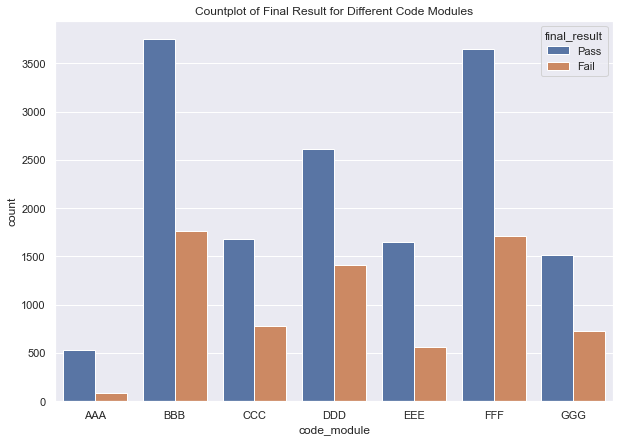

In [255]:
sns.set(font_scale=1)

plt.figure(figsize=(10, 7))
sns.countplot(x='code_module', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different Code Modules")
plt.show()

In [256]:
df2.groupby(['code_module'])['final_result'].count().reset_index()

,code_module,final_result
0,AAA,622
1,BBB,5521
2,CCC,2459
3,DDD,4022
4,EEE,2212
5,FFF,5359
6,GGG,2242


In [257]:
df2[df2['final_result'] == 'Fail'].groupby(['code_module'])['final_result'].count().reset_index()

,code_module,final_result
0,AAA,91
1,BBB,1767
2,CCC,781
3,DDD,1412
4,EEE,562
5,FFF,1711
6,GGG,728


In [258]:
total = df2.groupby(['code_module'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['code_module'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

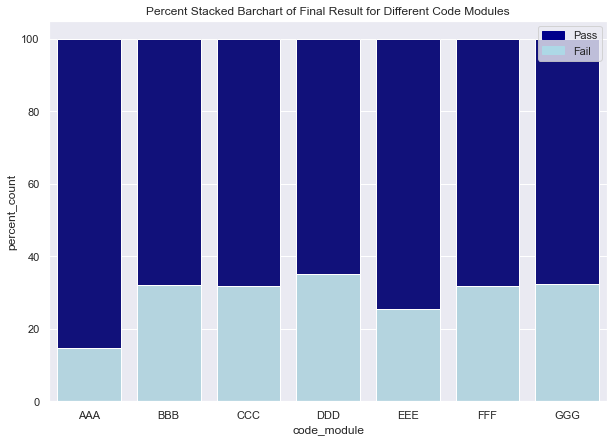

In [259]:
plt.figure(figsize=(10, 7))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="code_module",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="code_module", y="percent_count", data=fail, color='lightblue')

# add title
plt.title("Percent Stacked Barchart of Final Result for Different Code Modules")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

We noticed that module DDD has higher percentage of failing students while AAA has the lowest percentage of failing students, so we can say that students have higher tendency to fail if they take module DDD.

### ii) Code Presentation

In [260]:
df2['code_presentation'].value_counts()

2014J    7434
2013J    6476
2014B    5191
2013B    3336
Name: code_presentation, dtype: int64

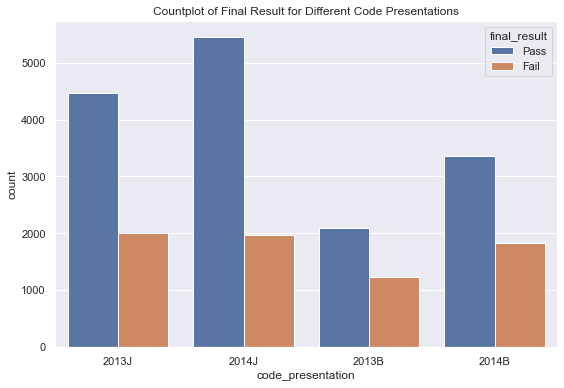

In [261]:
sns.set(font_scale=1)

plt.figure(figsize=(9, 6))
sns.countplot(x='code_presentation', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different Code Presentations")
plt.show()

In [262]:
total = df2.groupby(['code_presentation'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['code_presentation'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

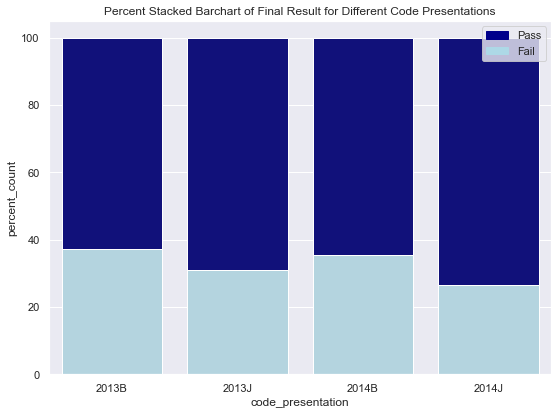

In [263]:
plt.figure(figsize=(9, 6.5))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="code_presentation",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="code_presentation", y="percent_count", data=fail, color='lightblue')

# add title
plt.title("Percent Stacked Barchart of Final Result for Different Code Presentations")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

From the plot above, we observed that presentation of 2013B has higher percentage of failing students while 2014J has the lowest percentage of failing students, so we can say that students have higher tendency to fail if they take module with presentation of 2013B.

### iii) Gender

In [264]:
df2['gender'].value_counts()

M    12205
F    10232
Name: gender, dtype: int64

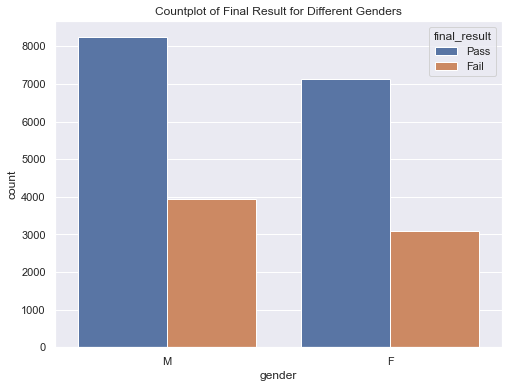

In [265]:
sns.set(font_scale=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different Genders")
plt.show()

In [266]:
total = df2.groupby(['gender'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['gender'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

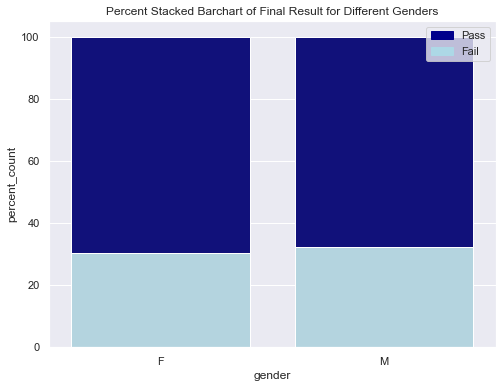

In [267]:
plt.figure(figsize=(8, 6))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="gender",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="gender", y="percent_count", data=fail, color='lightblue')

# add title
plt.title("Percent Stacked Barchart of Final Result for Different Genders")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

### iv) Region

In [268]:
df2['region'].value_counts()

Scotland                2539
East Anglian Region     2334
South Region            2164
London Region           2106
North Western Region    1872
South West Region       1678
West Midlands Region    1669
Wales                   1562
East Midlands Region    1543
South East Region       1462
Yorkshire Region        1349
North Region            1248
Ireland                  911
Name: region, dtype: int64

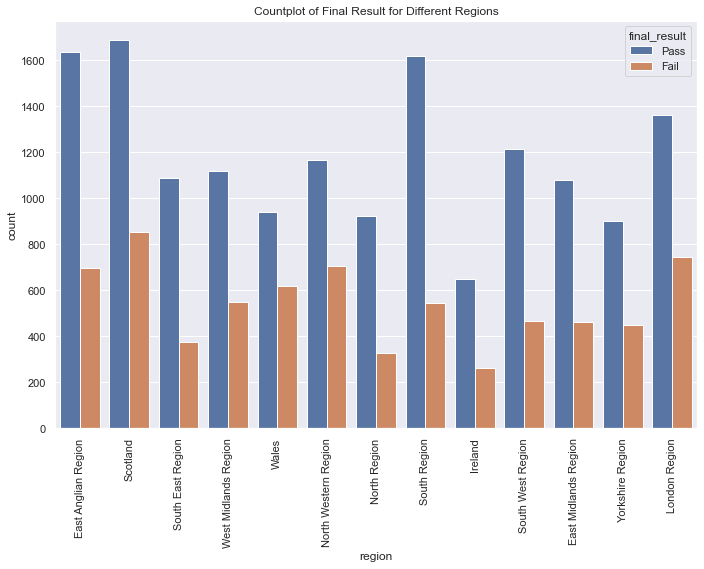

In [269]:
sns.set(font_scale=1)

plt.figure(figsize=(11.5, 7.5))
sns.countplot(x='region', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different Regions")
plt.xticks(rotation=90)
plt.show()

In [270]:
total = df2.groupby(['region'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['region'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

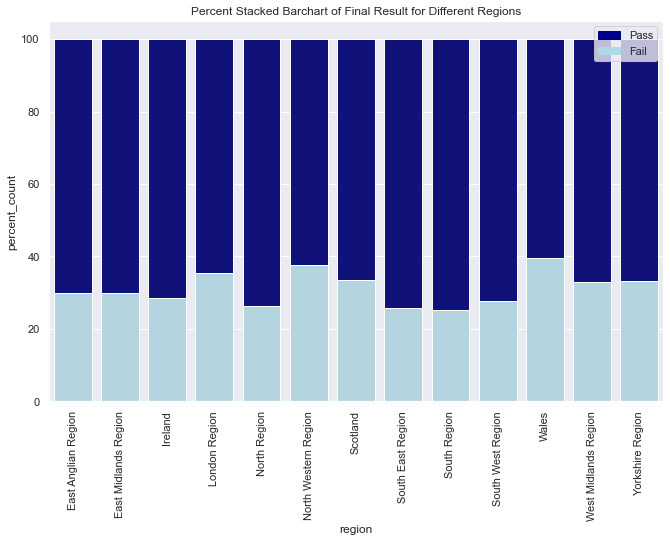

In [271]:
plt.figure(figsize=(11, 7))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="region",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="region", y="percent_count", data=fail, color='lightblue')

# add title and rotate axis labels
plt.title("Percent Stacked Barchart of Final Result for Different Regions")
plt.xticks(rotation=90)

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

We are able to identify the fact that students who live in Wales have higher percentage of failing students while students from South region has the lowest failing student percentage.

### v) Highest Education

In [272]:
df2['highest_education'].value_counts()

A Level or Equivalent          10015
Lower Than A Level              8538
HE Qualification                3447
Post Graduate Qualification      239
No Formal quals                  198
Name: highest_education, dtype: int64

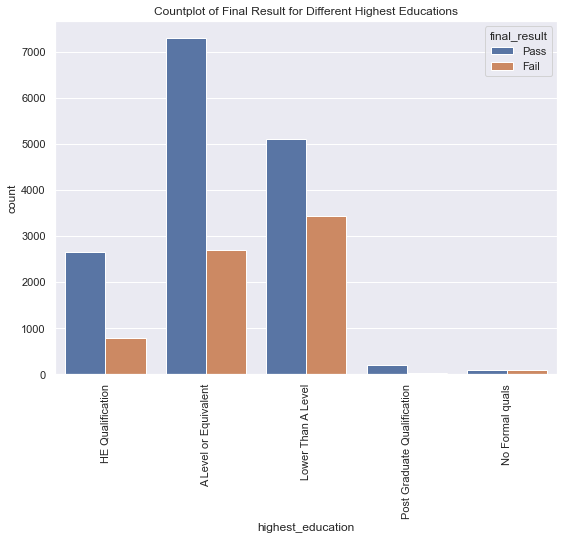

In [273]:
sns.set(font_scale=1)

plt.figure(figsize=(9, 6.5))
sns.countplot(x='highest_education', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different Highest Educations")
plt.xticks(rotation=90)
plt.show()

In [274]:
total = df2.groupby(['highest_education'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['highest_education'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

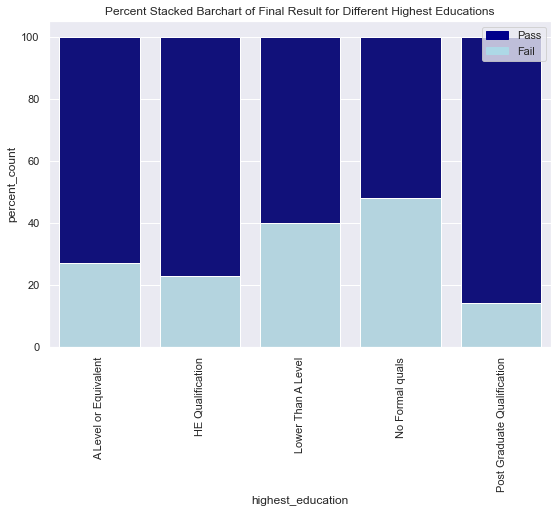

In [275]:
plt.figure(figsize=(9, 6))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="highest_education",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="highest_education", y="percent_count", data=fail, color='lightblue')

# add title and rotate axis labels
plt.title("Percent Stacked Barchart of Final Result for Different Highest Educations")
plt.xticks(rotation=90)

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

As expected, students with the highest qualification of Post Graduate have the lowest percentage of failing students while students with no formal qualifications have the highest percentage of failing students.

### vi) IMD Band 

In [276]:
df2['imd_band'].value_counts()

10-20%     3055
30-40%     2448
20-30%     2333
50-60%     2232
40-50%     2214
0-10%      2117
70-80%     2082
60-70%     2046
80-90%     1988
90-100%    1922
Name: imd_band, dtype: int64

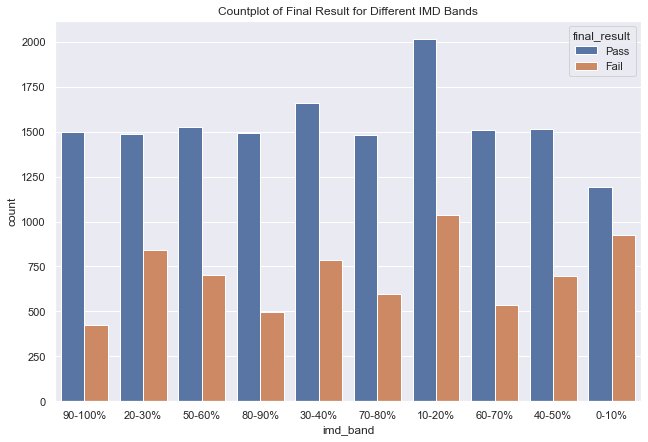

In [277]:
sns.set(font_scale=1)

plt.figure(figsize=(10.5, 7))
sns.countplot(x='imd_band', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different IMD Bands")
plt.show()

In [278]:
total = df2.groupby(['imd_band'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['imd_band'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

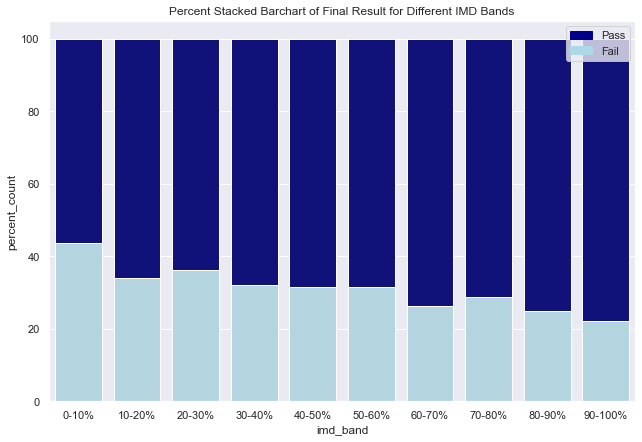

In [279]:
plt.figure(figsize=(10.5, 7))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="imd_band",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="imd_band", y="percent_count", data=fail, color='lightblue')

# add title and rotate axis labels
plt.title("Percent Stacked Barchart of Final Result for Different IMD Bands")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

The plot shows that the general expectations are quite true. 0-10% which is the most deprived 10% students have the most failed students in terms of percentage while 90-100% band (least deprived) have the least percentage of failing students.

### vii) Age Band

In [280]:
df2['age_band'].value_counts()

0-35     15563
35-55     6712
55<=       162
Name: age_band, dtype: int64

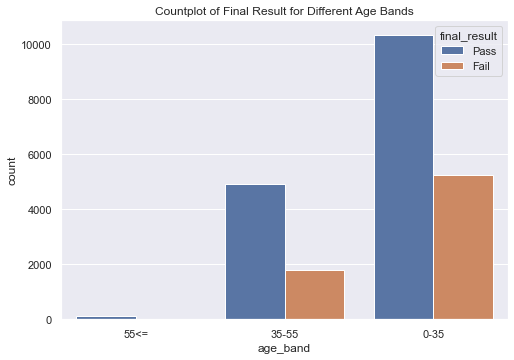

In [281]:
sns.set(font_scale=1)

plt.figure(figsize=(8, 5.5))
sns.countplot(x='age_band', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different Age Bands")
plt.show()

In [282]:
total = df2.groupby(['age_band'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['age_band'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

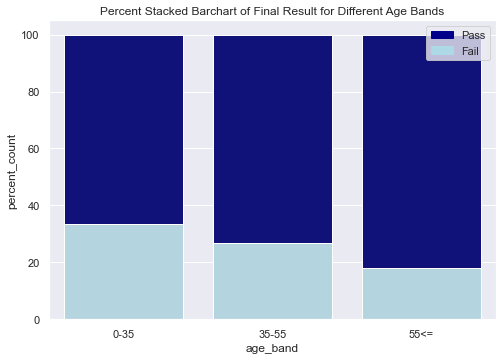

In [283]:
plt.figure(figsize=(8, 5.5))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="age_band",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="age_band", y="percent_count", data=fail, color='lightblue')

# add title and rotate axis labels
plt.title("Percent Stacked Barchart of Final Result for Different Age Bands")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

We observed that 0-35 age band has the highest percentage of failing students compared to the below 55 years old band which has the lowest percentage of failing students.

### viii) Disability

In [284]:
df2['disability'].value_counts()

N    20518
Y     1919
Name: disability, dtype: int64

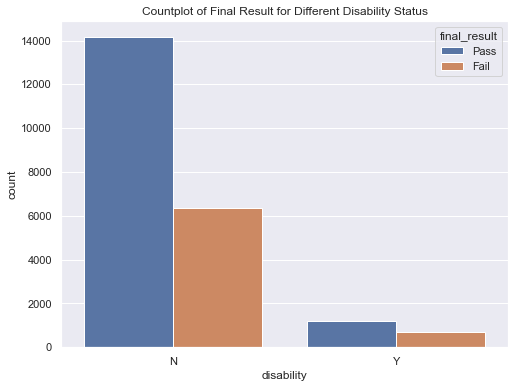

In [285]:
sns.set(font_scale=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='disability', hue='final_result', data=df2)
plt.title("Countplot of Final Result for Different Disability Status")
plt.show()

In [286]:
total = df2.groupby(['disability'])['final_result'].count().reset_index()
fail = df2[df2['final_result'] == 'Fail'].groupby(['disability'])['final_result'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['final_result'], total['final_result'])]
fail['percent_count'] = [i / j * 100 for i, j in zip(fail['final_result'], total['final_result'])]

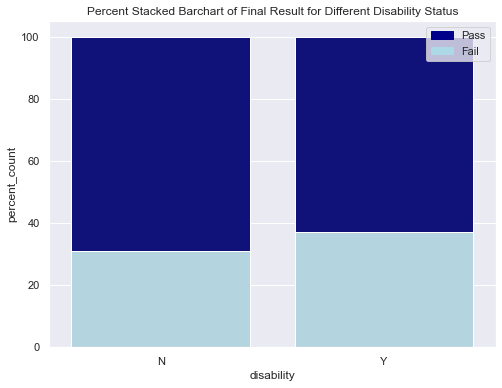

In [287]:
plt.figure(figsize=(8, 6))

# bar chart 1 -> top bars (group of 'Pass')
bar1 = sns.barplot(x="disability",  y="percent_count", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'Fail')
bar2 = sns.barplot(x="disability", y="percent_count", data=fail, color='lightblue')

# add title
plt.title("Percent Stacked Barchart of Final Result for Different Disability Status")

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Pass')
bottom_bar = mpatches.Patch(color='lightblue', label='Fail')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

As expected, students with disabilities have higher tendency to fail the course when compared with students without any disabilities, which is totally reasonable.

## Boxplots

### i) Weighted Score

It is important to remind again that weighted score should not be present in the later analyses due to its high indication of the final result of students.

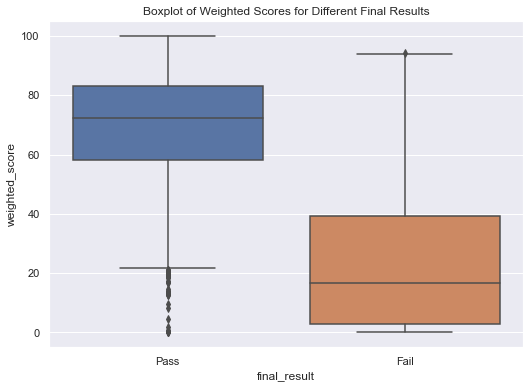

In [288]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 6))
sns.boxplot(x='final_result', y='weighted_score', data=df2)
plt.title("Boxplot of Weighted Scores for Different Final Results")
plt.show()

### ii) Pass Rate

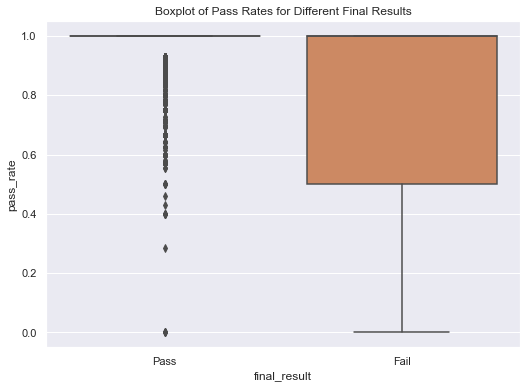

In [289]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 6))
sns.boxplot(x='final_result', y='pass_rate', data=df2)
plt.title("Boxplot of Pass Rates for Different Final Results")
plt.show()

### iii) Late Rate

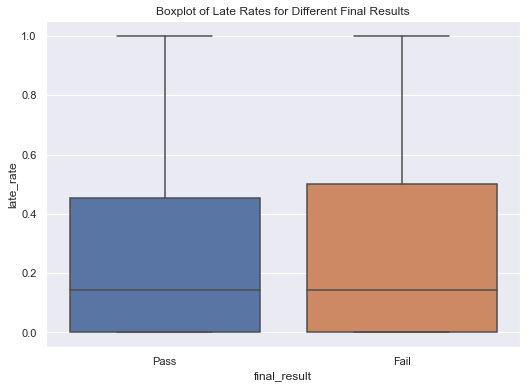

In [290]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 6))
sns.boxplot(x='final_result', y='late_rate', data=df2)
plt.title("Boxplot of Late Rates for Different Final Results")
plt.show()

### iv) Activity Type Count

In [291]:
df2['type_count'].value_counts()

9.0     4482
7.0     4009
8.0     3728
10.0    2364
6.0     2004
13.0    1099
14.0     973
11.0     958
12.0     836
5.0      686
0.0      377
4.0      355
3.0      186
15.0     170
2.0      117
1.0       93
Name: type_count, dtype: int64

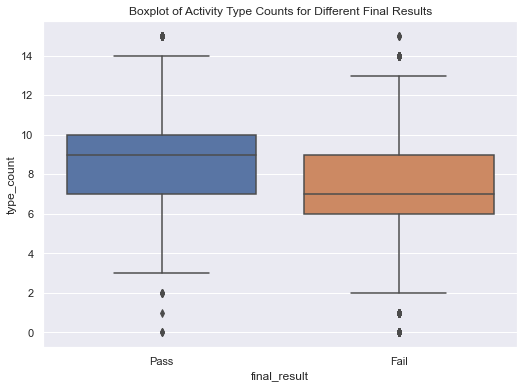

In [292]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 6))
sns.boxplot(x='final_result', y='type_count', data=df2)
plt.title("Boxplot of Activity Type Counts for Different Final Results")
plt.show()

## Side-by-Side Boxplots

### i) Total Activity Clicks

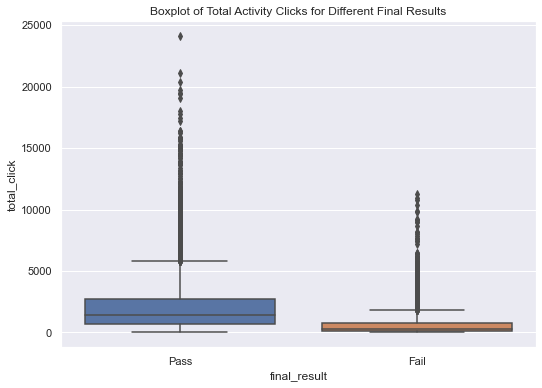

In [293]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 6))
sns.boxplot(x='final_result', y='total_click', data=df2)
plt.title("Boxplot of Total Activity Clicks for Different Final Results")
plt.show()

### ii) Average Daily Activity Clicks

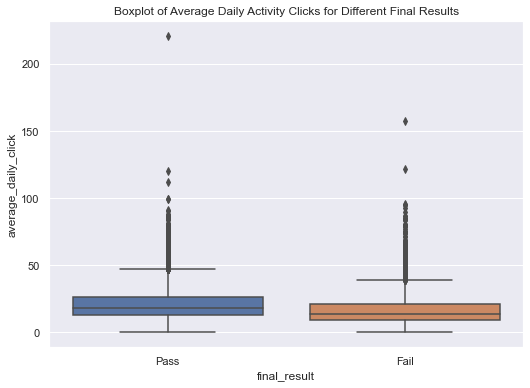

In [294]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 6))
sns.boxplot(x='final_result', y='average_daily_click', data=df2)
plt.title("Boxplot of Average Daily Activity Clicks for Different Final Results")
plt.show()

### iii) Other Activity Clicks

In [295]:
list(df2.iloc[:, 17:].columns)

['dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'foruming',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url']

In [296]:
pd.melt(df2, id_vars='final_result', value_vars=list(df2.iloc[:, 17:].columns), 
        var_name='activity_type', value_name='number_of_clicks')

,final_result,activity_type,number_of_clicks
0,Pass,dataplus,0.0
1,Pass,dataplus,10.0
2,Pass,dataplus,2.0
3,Pass,dataplus,0.0
4,Pass,dataplus,7.0
...,...,...,...
448735,Pass,url,0.0
448736,Fail,url,0.0
448737,Pass,url,0.0
448738,Pass,url,0.0


In [297]:
df2['quiz'].describe()

count    22437.000000
mean       289.283327
std        513.065378
min          0.000000
25%          0.000000
50%         92.000000
75%        385.000000
max      13032.000000
Name: quiz, dtype: float64

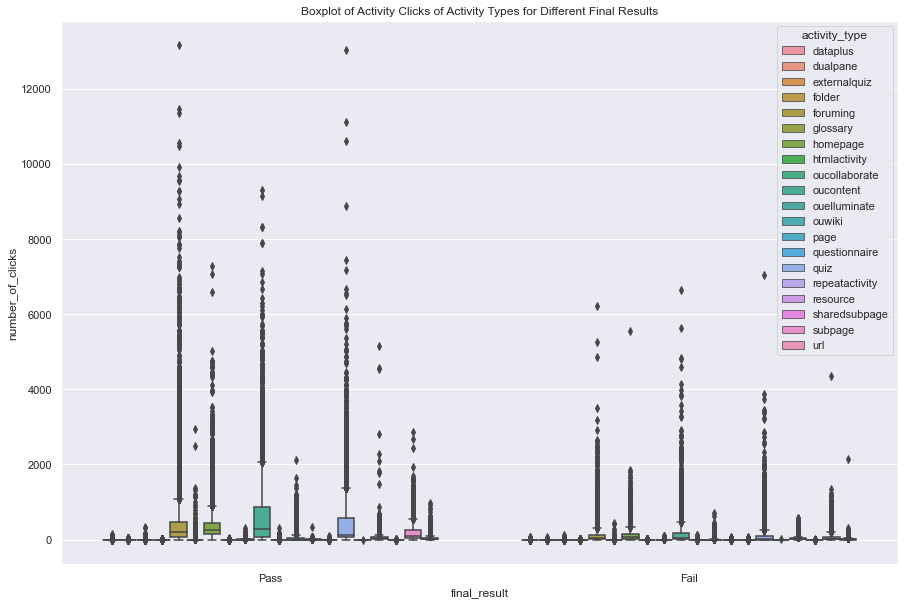

In [298]:
sns.set(font_scale=1)

plt.figure(figsize=(15, 10))
sns.boxplot(x='final_result', y='number_of_clicks', hue='activity_type', 
            data=pd.melt(df2, id_vars='final_result', value_vars=list(df2.iloc[:, 17:].columns), 
                         var_name='activity_type', value_name='number_of_clicks'))
plt.title("Boxplot of Activity Clicks of Activity Types for Different Final Results")
plt.show()

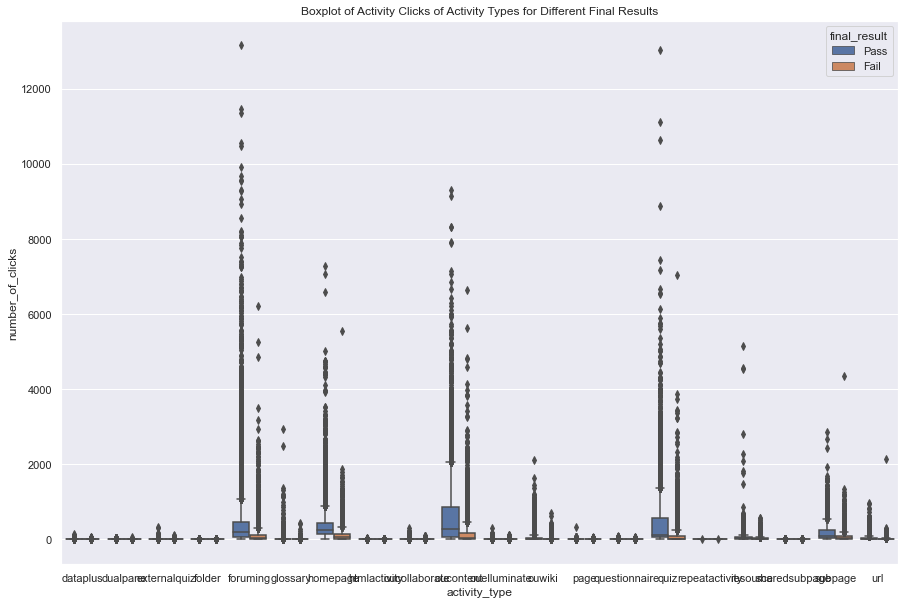

In [299]:
sns.set(font_scale=1)

plt.figure(figsize=(15, 10))
sns.boxplot(x='activity_type', y='number_of_clicks', hue='final_result', 
            data=pd.melt(df2, id_vars='final_result', value_vars=list(df2.iloc[:, 17:].columns), 
                         var_name='activity_type', value_name='number_of_clicks'))
plt.title("Boxplot of Activity Clicks of Activity Types for Different Final Results")
plt.show()

We decided to only take a few of them that has obvious differences in clicks.

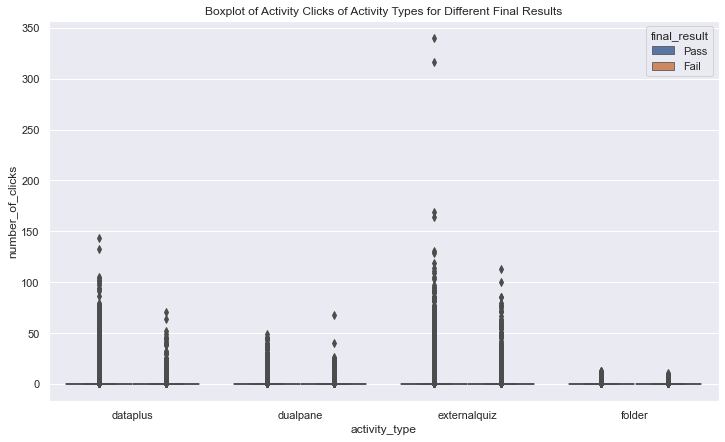

In [300]:
sns.set(font_scale=1)

plt.figure(figsize=(12, 7))
sns.boxplot(x='activity_type', y='number_of_clicks', hue='final_result', 
            data=pd.melt(df2, id_vars='final_result', value_vars=list(df2.iloc[:, 17:].columns), 
                         var_name='activity_type', value_name='number_of_clicks')[
                pd.melt(df2, id_vars='final_result', value_vars=list(df2.iloc[:, 17:].columns), 
                         var_name='activity_type', value_name='number_of_clicks')['activity_type'].isin(list(df2.iloc[:, 17:].columns)[:4])
            ])
plt.title("Boxplot of Activity Clicks of Activity Types for Different Final Results")
plt.show()

#### Foruming

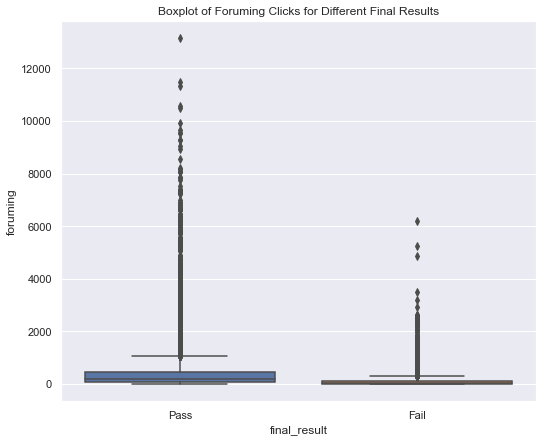

In [301]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 7))
sns.boxplot(x='final_result', y='foruming', data=df2)
plt.title("Boxplot of Foruming Clicks for Different Final Results")
plt.show()

#### Homepage

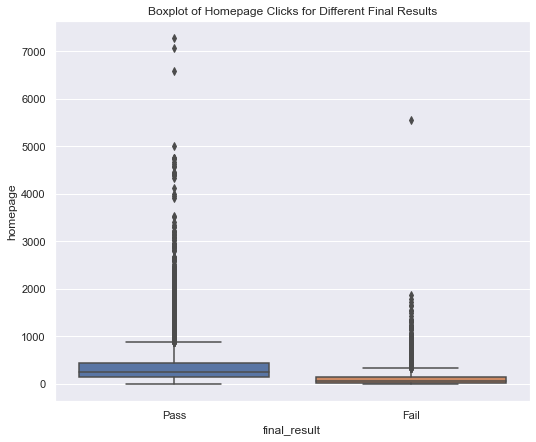

In [302]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 7))
sns.boxplot(x='final_result', y='homepage', data=df2)
plt.title("Boxplot of Homepage Clicks for Different Final Results")
plt.show()

#### OU Content

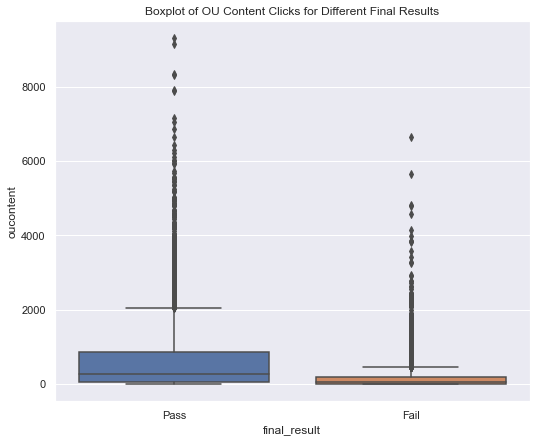

In [303]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 7))
sns.boxplot(x='final_result', y='oucontent', data=df2)
plt.title("Boxplot of OU Content Clicks for Different Final Results")
plt.show()

#### Quiz

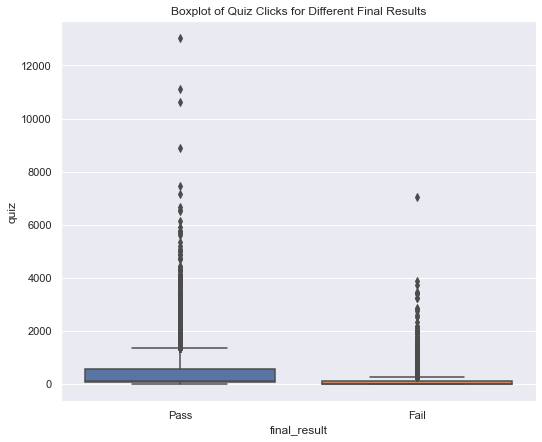

In [304]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 7))
sns.boxplot(x='final_result', y='quiz', data=df2)
plt.title("Boxplot of Quiz Clicks for Different Final Results")
plt.show()

#### Shared Subpage

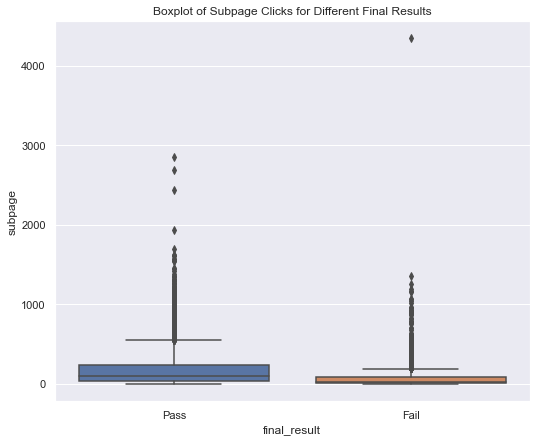

In [305]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 7))
sns.boxplot(x='final_result', y='subpage', data=df2)
plt.title("Boxplot of Subpage Clicks for Different Final Results")
plt.show()

Based on the observations from some of the boxplots above, it is seen that passed students tend to have higher amount clicks in overall, and these differences with failed students are obvious in foruming, homepage, OU content, quiz and subpage activity clicks.

## Chi-Squared Test

Chi-Squared test is a statistical test that is mainly used for the analysis of categorical variables relationship. Since our feature set contains several categorical variables and our target output is also a binary categorical feature, this test is suitable for our dataset.

Let's test the chi-square test on one feature before we create a for loop for proper overall testing.

In [306]:
pd.crosstab(df2['code_module'], df2['final_result'])

final_result,Fail,Pass
code_module,,
AAA,91,531
BBB,1767,3754
CCC,781,1678
DDD,1412,2610
EEE,562,1650
FFF,1711,3648
GGG,728,1514


In [307]:
pd.crosstab(df2['code_module'], df2['final_result']).index.name

'code_module'

In [308]:
# Create the contingency table
contingency = pd.crosstab(df2['code_module'], df2['final_result'])

# Chi-square test of independence
c, p, dof, expected = chi2_contingency(contingency) 

# Print the p-value
print(contingency.index.name)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

code_module
p value is 3.978715206555666e-29
Dependent (reject H0)


Now, we can use a for loop to conduct the test on all categorical features.

In [309]:
columns = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 
           'imd_band', 'age_band', 'disability']

p_list = []
chi2_list = []
result_list = []
for column in columns:
    
    # Create the contingency table
    contingency = pd.crosstab(df2[column], df2['final_result'])

    # Chi-square test of independence
    c, p, dof, expected = chi2_contingency(contingency) 

    # Print the feature name
    print(contingency.index.name)

    # interpret and print p-value
    alpha = 0.05
    p_list.append(p)
    chi2_list.append(c)
    
    print("p value is " + str(p))
    if p <= alpha:
        result_list.append('Reject H0')
        print('Dependent (reject H0)')
        print('\n')
    else:
        result_list.append('Fail to reject H0')
        print('Independent (H0 holds true)')
        print('\n')

code_module
p value is 3.978715206555666e-29
Dependent (reject H0)


code_presentation
p value is 1.76846905744352e-36
Dependent (reject H0)


gender
p value is 0.0011682826764138322
Dependent (reject H0)


region
p value is 6.924158564086001e-37
Dependent (reject H0)


highest_education
p value is 1.2513521964895634e-120
Dependent (reject H0)


imd_band
p value is 2.911167361170647e-66
Dependent (reject H0)


age_band
p value is 2.5587610113441862e-26
Dependent (reject H0)


disability
p value is 2.5237166831725735e-08
Dependent (reject H0)




In [310]:
pd.DataFrame({'feature': columns, 'p_value': p_list, 'chi2_score': chi2_list, 'chi2_result': result_list})

,feature,p_value,chi2_score,chi2_result
0,code_module,3.978715e-29,146.635484,Reject H0
1,code_presentation,1.768469e-36,169.337920,Reject H0
2,gender,1.168283e-03,10.539844,Reject H0
3,region,6.924159e-37,203.259494,Reject H0
4,highest_education,1.251352e-120,563.460961,Reject H0
5,imd_band,2.911167e-66,332.738380,Reject H0
6,age_band,2.558761e-26,117.855379,Reject H0
7,disability,2.523717e-08,31.043025,Reject H0


To our surprise, all 8 features are significant in chi-square test, in which the p-values are smaller than 0.05 which makes the test reject the null hypothesis H0. This means that all 8 features have relationships with final result.

Let's try to do the test using another style of codes.

In [311]:
def chi_square_test(X_train, y_train, X_test):
    # configure to select features
    chi = SelectKBest(score_func=chi2, k='all')
    
    # learn relationship from training data
    chi.fit(X_train, y_train)
    
    # transform train input data
    X_train_chi = chi.transform(X_train)
    
    # transform test input data
    X_test_chi = chi.transform(X_test)
    
    return X_train_chi, X_test_chi, chi

In [312]:
columns = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 
           'imd_band', 'age_band', 'disability']

# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(df2[columns], df2['final_result'], test_size=0.33, random_state=1)

# prepare input features
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# prepare target variable
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Chi square test feature selection
X_train_chi, X_test_chi, chi = chi_square_test(X_train_enc, y_train_enc, X_test_enc)

# Scores of features
for i in range(len(chi.scores_)):
    print('%s: %f' % (columns[i], chi.scores_[i]))

code_module: 0.399509
code_presentation: 40.729443
gender: 3.095287
region: 2.339261
highest_education: 182.965833
imd_band: 324.626874
age_band: 51.915163
disability: 28.737345


In [313]:
list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(chi.pvalues_)))

['Fail to reject H0',
 'Reject H0',
 'Fail to reject H0',
 'Fail to reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0']

In [314]:
# Put them into a df
pd.DataFrame({'feature': columns, 'score': list(chi.scores_), 'p_value': list(chi.pvalues_), 
              'chi2_result': list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(chi.pvalues_)))})

,feature,score,p_value,chi2_result
0,code_module,0.399509,5.273428e-01,Fail to reject H0
1,code_presentation,40.729443,1.748330e-10,Reject H0
2,gender,3.095287,7.851932e-02,Fail to reject H0
3,region,2.339261,1.261494e-01,Fail to reject H0
4,highest_education,182.965833,1.091157e-41,Reject H0
5,imd_band,324.626874,1.422624e-72,Reject H0
6,age_band,51.915163,5.795115e-13,Reject H0
7,disability,28.737345,8.288978e-08,Reject H0


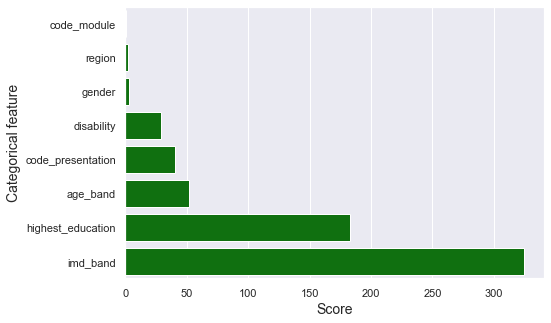

In [315]:
# plot the scores of features
dataset_chi = pd.DataFrame()
dataset_chi['feature'] = X_train.columns[ range(len(chi.scores_))]
dataset_chi['scores'] = chi.scores_
dataset_chi = dataset_chi.sort_values(by='scores', ascending=True)

plt.figure(figsize=(7.5, 5))
sns.barplot(x=dataset_chi['scores'], y=dataset_chi['feature'], color='green')
sns.set(font_scale=1)
plt.ylabel('Categorical feature', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.show()

## Mutual Information

Mutual information test is a test that is also suitable for analysing relationship between 2 categorical features, in our case that is a categorical input and a categorical target output.

In [316]:
def mutual_info_test(X_train, y_train, X_test):
    # configure to select features
    mi = SelectKBest(score_func=mutual_info_classif, k='all')
    
    # learn relationship from training data
    mi.fit(X_train, y_train)
    
    # transform train input data
    X_train_mi = mi.transform(X_train)
    
    # transform test input data
    X_test_mi = mi.transform(X_test)
    
    return X_train_mi, X_test_mi, mi

In [317]:
columns = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 
           'imd_band', 'age_band', 'disability']

# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(df2[columns], df2['final_result'], test_size=0.33, random_state=1)

# prepare input features
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# prepare target variable
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Chi square test feature selection
X_train_mi, X_test_mi, mi = mutual_info_test(X_train_enc, y_train_enc, X_test_enc)

# Scores of features
for i in range(len(mi.scores_)):
    print('%s: %f' % (columns[i], mi.scores_[i]))

code_module: 0.000000
code_presentation: 0.007131
gender: 0.000000
region: 0.002090
highest_education: 0.011844
imd_band: 0.009587
age_band: 0.011527
disability: 0.004228


In [318]:
# Put them into a df
pd.DataFrame({'feature': columns, 'score': list(mi.scores_)})

,feature,score
0,code_module,0.000000
1,code_presentation,0.007131
2,gender,0.000000
3,region,0.002090
4,highest_education,0.011844
5,imd_band,0.009587
6,age_band,0.011527
7,disability,0.004228


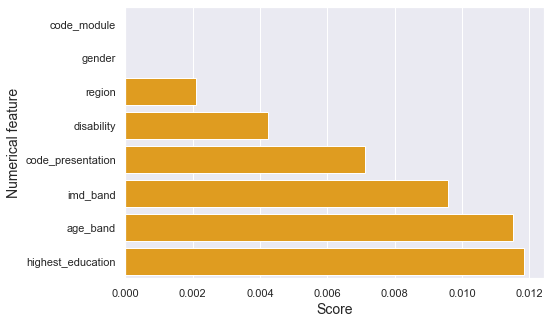

In [319]:
# plot the scores of features
dataset_mi = pd.DataFrame()
dataset_mi['feature'] = X_train.columns[range(len(mi.scores_))]
dataset_mi['scores'] = mi.scores_
dataset_mi = dataset_mi.sort_values(by='scores', ascending=True)

plt.figure(figsize=(7.5, 5))
sns.barplot(x=dataset_mi['scores'], y=dataset_mi['feature'], color='orange')
sns.set(font_scale=1)
plt.ylabel('Numerical feature', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.show()

# Numerical Input, Categorical Output

## ANOVA F-Test

The ANOVA F-Test is a test that is used to analyse statistical relationship between numerical features and categorical target output. In our case, this test is suitable for selecting numerical features that are significant to the final result target.

In [320]:
list(df2.columns[7:9]) + list(df2.columns[12:])

['num_of_prev_attempts',
 'studied_credits',
 'pass_rate',
 'late_rate',
 'type_count',
 'total_click',
 'average_daily_click',
 'dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'foruming',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url']

In [321]:
def anova_f_test(X_train, y_train, X_test):
    # configure to select features
    fs = SelectKBest(score_func=f_classif, k='all')
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

In [322]:
columns = list(df2.columns[7:9]) + list(df2.columns[12:])

# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(df2[columns], df2['final_result'], test_size=0.33, random_state=1)

# ANOVA F-test feature selection
X_train_af, X_test_af, af = anova_f_test(X_train, y_train, X_test)

# Scores of features
for i in range(len(af.scores_)):
    print('%s: %f' % (columns[i], af.scores_[i]))

num_of_prev_attempts: 255.790497
studied_credits: 6.914166
pass_rate: 4336.406096
late_rate: 112.173338
type_count: 2363.114329
total_click: 2173.970311
average_daily_click: 510.853727
dataplus: 411.027733
dualpane: 232.820954
externalquiz: 122.247297
folder: 226.663367
foruming: 746.461926
glossary: 27.694999
homepage: 1738.495261
htmlactivity: 71.455571
oucollaborate: 386.881209
oucontent: 1264.326402
ouelluminate: 26.380400
ouwiki: 531.865170
page: 186.735958
questionnaire: 462.281079
quiz: 726.793482
repeatactivity: 0.468382
resource: 446.814201
sharedsubpage: 4.982104
subpage: 1105.076756
url: 655.793597


In [323]:
af.scores_

array([2.55790497e+02, 6.91416579e+00, 4.33640610e+03, 1.12173338e+02,
       2.36311433e+03, 2.17397031e+03, 5.10853727e+02, 4.11027733e+02,
       2.32820954e+02, 1.22247297e+02, 2.26663367e+02, 7.46461926e+02,
       2.76949986e+01, 1.73849526e+03, 7.14555708e+01, 3.86881209e+02,
       1.26432640e+03, 2.63804004e+01, 5.31865170e+02, 1.86735958e+02,
       4.62281079e+02, 7.26793482e+02, 4.68382379e-01, 4.46814201e+02,
       4.98210410e+00, 1.10507676e+03, 6.55793597e+02])

In [324]:
af.scores_[af.scores_ >= 400]  # We have 14 features

array([4336.40609638, 2363.11432906, 2173.97031083,  510.85372693,
        411.02773343,  746.46192647, 1738.49526147, 1264.32640188,
        531.86516953,  462.28107852,  726.79348236,  446.81420137,
       1105.07675623,  655.7935968 ])

In [325]:
list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(af.pvalues_)))

['Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Fail to reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0']

In [326]:
# Put them into a df
pd.DataFrame({'feature': columns, 'score': list(af.scores_), 'p_value': list(af.pvalues_), 
              'anova_result': list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(af.pvalues_)))})

,feature,score,p_value,anova_result
0,num_of_prev_attempts,255.790497,4.198770e-57,Reject H0
1,studied_credits,6.914166,8.560260e-03,Reject H0
2,pass_rate,4336.406096,0.000000e+00,Reject H0
3,late_rate,112.173338,4.046966e-26,Reject H0
4,type_count,2363.114329,0.000000e+00,Reject H0
5,total_click,2173.970311,0.000000e+00,Reject H0
6,average_daily_click,510.853727,2.932692e-111,Reject H0
7,dataplus,411.027733,3.506544e-90,Reject H0
8,dualpane,232.820954,3.556798e-52,Reject H0
9,externalquiz,122.247297,2.619994e-28,Reject H0


In [327]:
pd.DataFrame({'feature': columns, 'score': list(af.scores_), 'p_value': list(af.pvalues_), 
              'anova_result': list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(af.pvalues_)))})[
    pd.DataFrame({'feature': columns, 'score': list(af.scores_), 'p_value': list(af.pvalues_), 
                  'anova_result': list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(af.pvalues_)))})['score'] >= 400
].sort_values('score', ascending=False)

,feature,score,p_value,anova_result
2,pass_rate,4336.406096,0.000000e+00,Reject H0
4,type_count,2363.114329,0.000000e+00,Reject H0
5,total_click,2173.970311,0.000000e+00,Reject H0
13,homepage,1738.495261,0.000000e+00,Reject H0
16,oucontent,1264.326402,5.771709e-266,Reject H0
25,subpage,1105.076756,6.960752e-234,Reject H0
11,foruming,746.461926,1.904876e-160,Reject H0
21,quiz,726.793482,2.273975e-156,Reject H0
26,url,655.793597,1.310947e-141,Reject H0
18,ouwiki,531.865170,1.120015e-115,Reject H0


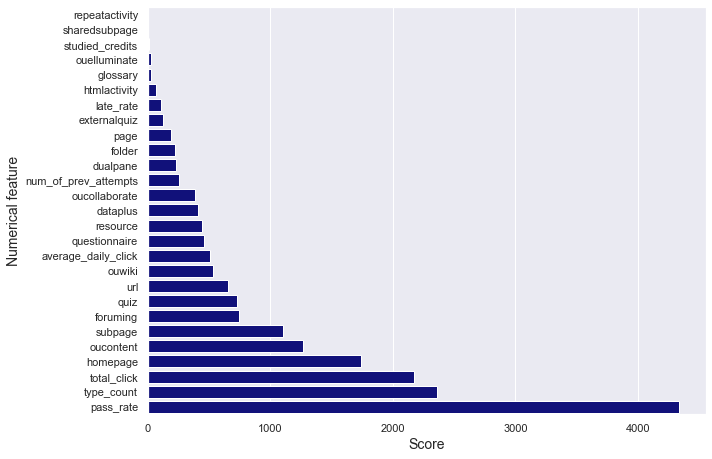

In [328]:
# plot the scores of features
dataset_anova = pd.DataFrame()
dataset_anova['feature'] = X_train.columns[range(len(af.scores_))]
dataset_anova['scores'] = af.scores_
dataset_anova = dataset_anova.sort_values(by='scores', ascending=True)

plt.figure(figsize=(10, 7.5))
sns.barplot(x=dataset_anova['scores'], y=dataset_anova['feature'], color='darkblue')
sns.set(font_scale=1)
plt.ylabel('Numerical feature', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.show()

Using the score threshold value of 400, we selected a total of 14 features from 27 numerical features, about half of the features being chosen by ANOVA F-Test which is alright.

In [329]:
dataset_anova['feature'].iloc[13:].sort_values()

6     average_daily_click
7                dataplus
11               foruming
13               homepage
16              oucontent
18                 ouwiki
2               pass_rate
20          questionnaire
21                   quiz
23               resource
25                subpage
5             total_click
4              type_count
26                    url
Name: feature, dtype: object

## T-Test (Rejected)

T-test is also used for relationship between one continuous and one categorical variable, making it a similar nature test to the ANOVA F-test. Let's test it on one variable which is number of previous attempts first.

After subsetting the data based on the target variable, we need to perform assumption checks before we are able to perform the T-tests, this can be done with the Shapiro test.

In [330]:
# Subset the data
passed = df2[df2['final_result'] == 'Pass']['num_of_prev_attempts']
failed = df2[df2['final_result'] == 'Fail']['num_of_prev_attempts']

# Check assumptions
print("Pass:", shapiro(passed))
print("Fail:", shapiro(failed))

Pass: ShapiroResult(statistic=0.30894607305526733, pvalue=0.0)
Fail: ShapiroResult(statistic=0.4743037819862366, pvalue=0.0)


C:\Users\wz_ch\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [331]:
# Subset the data
passed = df2[df2['final_result'] == 'Pass']['studied_credits']
failed = df2[df2['final_result'] == 'Fail']['studied_credits']

# Check assumptions
print("Pass:", shapiro(passed))
print("Fail:", shapiro(failed))

Pass: ShapiroResult(statistic=0.7797499895095825, pvalue=0.0)
Fail: ShapiroResult(statistic=0.7954981327056885, pvalue=0.0)


In [332]:
# Subset the data
passed = df2[df2['final_result'] == 'Pass']['pass_rate']
failed = df2[df2['final_result'] == 'Fail']['pass_rate']

# Check assumptions
print("Pass:", shapiro(passed))
print("Fail:", shapiro(failed))

Pass: ShapiroResult(statistic=0.385225772857666, pvalue=0.0)
Fail: ShapiroResult(statistic=0.6893386840820312, pvalue=0.0)


The T-test is not suitable due to failed to validate normality test, at least for 3 of the numerical features. Because of this, we'll proceed with Mutual Information test in order to be on the safe side.

## Kendall's Rank Correlation

Kendall's rank correlation test is a statistical test that is suitable to be applied for analysis and feature selection of datasets involving numerical inputs and categorical target output.

In [333]:
kendalltau(df2['average_daily_click'], df2['final_result'])

KendalltauResult(correlation=0.1747815684595389, pvalue=1.7775993991670862e-225)

In [334]:
columns = list(df2.columns[7:9]) + list(df2.columns[12:])

coefs = []
pvals = []
for column in columns:
    coef, pval = kendalltau(df2[column], df2['final_result'])
    coefs.append(coef)
    pvals.append(pval)
    print("%s: %.4f" % (column, coef))

num_of_prev_attempts: -0.1392
studied_credits: -0.0186
pass_rate: 0.3941
late_rate: -0.0240
type_count: 0.2835
total_click: 0.4210
average_daily_click: 0.1748
dataplus: 0.2015
dualpane: 0.1444
externalquiz: 0.0235
folder: 0.1434
foruming: 0.3453
glossary: 0.1452
homepage: 0.4249
htmlactivity: 0.0502
oucollaborate: 0.2066
oucontent: 0.3033
ouelluminate: 0.0256
ouwiki: 0.1792
page: 0.1036
questionnaire: 0.1704
quiz: 0.2747
repeatactivity: -0.0038
resource: 0.3332
sharedsubpage: 0.0114
subpage: 0.2977
url: 0.2818


In [335]:
list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', pvals))

['Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Fail to reject H0',
 'Reject H0',
 'Fail to reject H0',
 'Reject H0',
 'Reject H0']

In [336]:
# Put them into a df
pd.DataFrame({'feature': columns, 'coefficient': coefs, 'p_value': pvals, 
              'kendall_result': list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', pvals))})

,feature,coefficient,p_value,kendall_result
0,num_of_prev_attempts,-0.139194,1.752021e-98,Reject H0
1,studied_credits,-0.018596,2.585335e-03,Reject H0
2,pass_rate,0.394058,0.000000e+00,Reject H0
3,late_rate,-0.024021,4.128796e-05,Reject H0
4,type_count,0.283455,0.000000e+00,Reject H0
5,total_click,0.421020,0.000000e+00,Reject H0
6,average_daily_click,0.174782,1.777599e-225,Reject H0
7,dataplus,0.201485,7.617588e-212,Reject H0
8,dualpane,0.144444,6.822124e-111,Reject H0
9,externalquiz,0.023535,2.464038e-04,Reject H0


In [337]:
# We need the coefficients to be absolute since there are negative values
[abs(coef) for coef in coefs]

[0.13919446507230004,
 0.018596076390068186,
 0.39405848945185723,
 0.024020947668000465,
 0.2834548716809014,
 0.42101986976173594,
 0.1747815684595389,
 0.2014851977575578,
 0.1444443835597584,
 0.023534558581209175,
 0.14336583661242067,
 0.34529346554347845,
 0.14523513167206284,
 0.4249329589494619,
 0.050241721149760825,
 0.20660735739587568,
 0.3032787034404083,
 0.02561638340564966,
 0.17921816935704118,
 0.10364525483472524,
 0.17042009086932197,
 0.27472765177722364,
 0.003777162939266492,
 0.3331861668837694,
 0.011412147029389733,
 0.2976677476729815,
 0.28178762161104104]

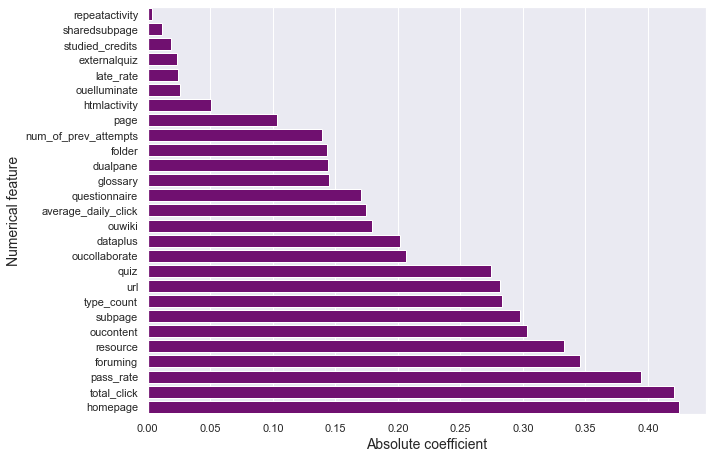

In [338]:
# plot the scores of features
dataset_kendall = pd.DataFrame()
dataset_kendall['feature'] = columns
dataset_kendall['coefficient'] = [abs(coef) for coef in coefs]
dataset_kendall = dataset_kendall.sort_values(by='coefficient', ascending=True)

plt.figure(figsize=(10, 7.5))
sns.barplot(x=dataset_kendall['coefficient'], y=dataset_kendall['feature'], color='purple')
sns.set(font_scale=1)
plt.ylabel('Numerical feature', fontsize=14)
plt.xlabel('Absolute coefficient', fontsize=14)
plt.show()

In [339]:
dataset_kendall['feature'].iloc[13:].sort_values()

6     average_daily_click
7                dataplus
11               foruming
13               homepage
15          oucollaborate
16              oucontent
18                 ouwiki
2               pass_rate
21                   quiz
23               resource
25                subpage
5             total_click
4              type_count
26                    url
Name: feature, dtype: object

Like previously, we'll pick half of these features, perhaps 14 features from the total of 27 features.

## Review features obtained

Now it's time for us to compile and compare the selected features. Using 2 sets of combinations, we have the methods of Chi-square + ANOVA F-test along with another set of methods with Mutual Information + Kendall's Rank test.

### First Statistical Method combination

#### Chi-Square Test

In [340]:
dataset_chi['feature'].iloc[3:].sort_values()

6             age_band
1    code_presentation
7           disability
4    highest_education
5             imd_band
Name: feature, dtype: object

#### ANOVA F-Test

In [341]:
dataset_anova['feature'].iloc[13:].sort_values()

6     average_daily_click
7                dataplus
11               foruming
13               homepage
16              oucontent
18                 ouwiki
2               pass_rate
20          questionnaire
21                   quiz
23               resource
25                subpage
5             total_click
4              type_count
26                    url
Name: feature, dtype: object

#### Final set of selected features

In [342]:
list(dataset_chi['feature'].iloc[3:].sort_values()) + list(dataset_anova['feature'].iloc[13:].sort_values())

['age_band',
 'code_presentation',
 'disability',
 'highest_education',
 'imd_band',
 'average_daily_click',
 'dataplus',
 'foruming',
 'homepage',
 'oucontent',
 'ouwiki',
 'pass_rate',
 'questionnaire',
 'quiz',
 'resource',
 'subpage',
 'total_click',
 'type_count',
 'url']

### Second Statistcal Method combination

#### Mutual Information

In [343]:
dataset_mi['feature'].iloc[3:].sort_values()

6             age_band
1    code_presentation
7           disability
4    highest_education
5             imd_band
Name: feature, dtype: object

#### Kendall's Rank Correlation

In [344]:
dataset_kendall['feature'].iloc[13:].sort_values()

6     average_daily_click
7                dataplus
11               foruming
13               homepage
15          oucollaborate
16              oucontent
18                 ouwiki
2               pass_rate
21                   quiz
23               resource
25                subpage
5             total_click
4              type_count
26                    url
Name: feature, dtype: object

#### Final set of selected features

In [345]:
list(dataset_mi['feature'].iloc[3:].sort_values()) + list(dataset_kendall['feature'].iloc[13:].sort_values())

['age_band',
 'code_presentation',
 'disability',
 'highest_education',
 'imd_band',
 'average_daily_click',
 'dataplus',
 'foruming',
 'homepage',
 'oucollaborate',
 'oucontent',
 'ouwiki',
 'pass_rate',
 'quiz',
 'resource',
 'subpage',
 'total_click',
 'type_count',
 'url']

## Prepare the New Datasets

In [346]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   gender                22437 non-null  object 
 3   region                22437 non-null  object 
 4   highest_education     22437 non-null  object 
 5   imd_band              22437 non-null  object 
 6   age_band              22437 non-null  object 
 7   num_of_prev_attempts  22437 non-null  int64  
 8   studied_credits       22437 non-null  int64  
 9   disability            22437 non-null  object 
 10  final_result          22437 non-null  object 
 11  weighted_score        22437 non-null  float64
 12  pass_rate             22437 non-null  float64
 13  late_rate             22437 non-null  float64
 14  type_count            22437 non-null  float64
 15  total_click        

### First Statistical Method combination

In [347]:
df_sf1 = df2.loc[:, list(dataset_chi['feature'].iloc[3:].sort_values()) + \
                 list(dataset_anova['feature'].iloc[13:].sort_values()) + ['final_result']]
df_sf1.head()

,age_band,code_presentation,disability,highest_education,imd_band,average_daily_click,dataplus,foruming,homepage,oucontent,ouwiki,pass_rate,questionnaire,quiz,resource,subpage,total_click,type_count,url,final_result
0,55<=,2013J,N,HE Qualification,90-100%,23.350000,0.0,193.0,138.0,553.0,0.0,1.0,0.0,0.0,13.0,32.0,934.0,6.0,5.0,Pass
1,35-55,2013J,N,HE Qualification,20-30%,17.937500,10.0,417.0,324.0,537.0,0.0,1.0,0.0,0.0,12.0,87.0,1435.0,7.0,48.0,Pass
2,35-55,2013J,N,A Level or Equivalent,50-60%,17.544715,2.0,634.0,432.0,836.0,0.0,1.0,0.0,0.0,19.0,144.0,2158.0,8.0,90.0,Pass
3,0-35,2013J,N,Lower Than A Level,50-60%,14.771429,0.0,194.0,204.0,494.0,0.0,0.6,0.0,0.0,45.0,79.0,1034.0,7.0,14.0,Pass
4,35-55,2013J,N,A Level or Equivalent,80-90%,17.097902,7.0,875.0,512.0,900.0,0.0,1.0,0.0,0.0,11.0,91.0,2445.0,8.0,45.0,Pass


In [348]:
df_sf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_band             22437 non-null  object 
 1   code_presentation    22437 non-null  object 
 2   disability           22437 non-null  object 
 3   highest_education    22437 non-null  object 
 4   imd_band             22437 non-null  object 
 5   average_daily_click  22437 non-null  float64
 6   dataplus             22437 non-null  float64
 7   foruming             22437 non-null  float64
 8   homepage             22437 non-null  float64
 9   oucontent            22437 non-null  float64
 10  ouwiki               22437 non-null  float64
 11  pass_rate            22437 non-null  float64
 12  questionnaire        22437 non-null  float64
 13  quiz                 22437 non-null  float64
 14  resource             22437 non-null  float64
 15  subpage              22437 non-null 

In [349]:
df_sf1.shape

(22437, 20)

### Second Statistical Method combination

In [350]:
df_sf2 = df2.loc[:, list(dataset_mi['feature'].iloc[3:].sort_values()) + \
                 list(dataset_kendall['feature'].iloc[13:].sort_values()) + ['final_result']]
df_sf2.head()

,age_band,code_presentation,disability,highest_education,imd_band,average_daily_click,dataplus,foruming,homepage,oucollaborate,oucontent,ouwiki,pass_rate,quiz,resource,subpage,total_click,type_count,url,final_result
0,55<=,2013J,N,HE Qualification,90-100%,23.350000,0.0,193.0,138.0,0.0,553.0,0.0,1.0,0.0,13.0,32.0,934.0,6.0,5.0,Pass
1,35-55,2013J,N,HE Qualification,20-30%,17.937500,10.0,417.0,324.0,0.0,537.0,0.0,1.0,0.0,12.0,87.0,1435.0,7.0,48.0,Pass
2,35-55,2013J,N,A Level or Equivalent,50-60%,17.544715,2.0,634.0,432.0,0.0,836.0,0.0,1.0,0.0,19.0,144.0,2158.0,8.0,90.0,Pass
3,0-35,2013J,N,Lower Than A Level,50-60%,14.771429,0.0,194.0,204.0,0.0,494.0,0.0,0.6,0.0,45.0,79.0,1034.0,7.0,14.0,Pass
4,35-55,2013J,N,A Level or Equivalent,80-90%,17.097902,7.0,875.0,512.0,0.0,900.0,0.0,1.0,0.0,11.0,91.0,2445.0,8.0,45.0,Pass


In [351]:
df_sf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_band             22437 non-null  object 
 1   code_presentation    22437 non-null  object 
 2   disability           22437 non-null  object 
 3   highest_education    22437 non-null  object 
 4   imd_band             22437 non-null  object 
 5   average_daily_click  22437 non-null  float64
 6   dataplus             22437 non-null  float64
 7   foruming             22437 non-null  float64
 8   homepage             22437 non-null  float64
 9   oucollaborate        22437 non-null  float64
 10  oucontent            22437 non-null  float64
 11  ouwiki               22437 non-null  float64
 12  pass_rate            22437 non-null  float64
 13  quiz                 22437 non-null  float64
 14  resource             22437 non-null  float64
 15  subpage              22437 non-null 

In [352]:
df_sf2.shape

(22437, 20)

## Sampling Methods

Sampling is a crucial technique that we should apply to deal with the imbalance issue of our dataset for better classification. Thus, we'll apply the necessary functions and see how are the results of the datasets.

The below sampling processes are just purely demonstration. The actual sampling that takes into account of training and testing sets are shown in another notebook. This is because for sampling, we can only perform it on training data in order to preserve the originality of the test set when we want to test the performance of models on test set.

In [353]:
df2.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,1.0,0.0,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,1.0,0.4,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0
2,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,1.0,0.0,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0
3,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,0.6,1.0,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0
4,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,1.0,0.2,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0


In [354]:
df2.shape

(22437, 37)

In [355]:
df2['final_result'].value_counts()

Pass    15385
Fail     7052
Name: final_result, dtype: int64

### Random Oversampling

In [356]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=1)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(df2.drop(columns='final_result'), df2['final_result'])

# summarize class distribution
y_over.value_counts()f

Fail    15385
Pass    15385
Name: final_result, dtype: int64

In [357]:
pd.concat([X_over, y_over], axis=1)

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,82.400,1.000,0.000,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0,Pass
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,65.400,1.000,0.400,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0,Pass
2,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,76.300,1.000,0.000,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0,Pass
3,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,55.000,0.600,1.000,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0,Pass
4,AAA,2013J,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,66.900,1.000,0.200,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30765,GGG,2014J,F,Wales,Lower Than A Level,50-60%,35-55,0,30,Y,6.450,1.000,1.000,5.0,118.0,4.538462,0.0,0.0,0.0,0.0,42.0,0.0,39.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,2.0,0.0,Fail
30766,BBB,2014J,F,South West Region,Lower Than A Level,20-30%,0-35,0,60,N,45.400,0.750,0.250,8.0,434.0,13.562500,0.0,0.0,0.0,0.0,1.0,1.0,176.0,0.0,0.0,173.0,0.0,0.0,0.0,0.0,16.0,0.0,24.0,0.0,42.0,1.0,Fail
30767,FFF,2014B,M,South Region,Lower Than A Level,90-100%,35-55,0,60,N,18.500,1.000,0.000,8.0,206.0,18.727273,0.0,0.0,0.0,0.0,41.0,0.0,60.0,0.0,0.0,27.0,0.0,3.0,4.0,0.0,0.0,0.0,14.0,0.0,51.0,6.0,Fail
30768,CCC,2014B,M,North Western Region,HE Qualification,30-40%,0-35,0,90,N,25.065,0.875,0.875,7.0,730.0,20.857143,0.0,0.0,0.0,0.0,12.0,0.0,125.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,293.0,0.0,45.0,0.0,38.0,2.0,Fail


### SMOTE Sampling

In [446]:
# define SMOTE function
smote = SMOTE(random_state=1)

# fit and apply the transform
X_smote, y_smote = smote.fit_resample(pd.get_dummies(df2.drop(columns='final_result')), df2['final_result'])

# summarize class distribution
y_smote.value_counts()

Fail    15385
Pass    15385
Name: final_result, dtype: int64

In [447]:
pd.concat([X_smote, y_smote], axis=1)

,num_of_prev_attempts,studied_credits,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_0-10%,imd_band_10-20%,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y,final_result
0,0,240,82.400000,1.000000,0.000000,6.000000,934.000000,23.350000,0.0,0.0,0.000000,0.0,193.000000,0.0,138.000000,0.0,0.000000,553.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,13.000000,0.0,32.000000,5.000000,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,Pass
1,0,60,65.400000,1.000000,0.400000,7.000000,1435.000000,17.937500,10.0,0.0,0.000000,0.0,417.000000,0.0,324.000000,0.0,0.000000,537.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,12.000000,0.0,87.000000,48.000000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,Pass
2,0,60,76.300000,1.000000,0.000000,8.000000,2158.000000,17.544715,2.0,0.0,0.000000,0.0,634.000000,1.0,432.000000,0.0,0.000000,836.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,19.000000,0.0,144.000000,90.000000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,Pass
3,0,60,55.000000,0.600000,1.000000,7.000000,1034.000000,14.771429,0.0,0.0,0.000000,0.0,194.000000,4.0,204.000000,0.0,0.000000,494.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,45.000000,0.0,79.000000,14.000000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,Pass
4,0,60,66.900000,1.000000,0.200000,8.000000,2445.000000,17.097902,7.0,0.0,0.000000,0.0,875.000000,4.0,512.000000,0.0,0.000000,900.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,11.000000,0.0,91.000000,45.000000,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30765,0,30,38.846909,1.000000,0.009349,6.000000,224.953255,11.707382,0.0,0.0,0.000000,0.0,31.813021,0.0,56.813021,0.0,0.000000,74.719532,0.000000,0.000000,0.000000,0.0,34.701171,0.0,8.420703,0.0,18.485808,0.000000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,Fail
30766,0,60,13.530290,0.697789,0.550368,9.906633,878.280101,13.032954,0.0,0.0,7.626532,0.0,331.201516,0.0,271.373468,0.0,0.000000,75.732155,2.813266,9.454580,1.813266,0.0,0.000000,0.0,34.412761,0.0,117.265319,26.587239,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,Fail
30767,0,113,11.585956,0.154695,0.814366,8.566854,767.000000,20.302466,0.0,0.0,6.566854,0.0,84.807851,0.0,159.273022,0.0,0.783427,108.994392,0.000000,18.018816,0.000000,0.0,0.000000,0.0,71.879501,0.0,304.058442,12.617695,0,0,0,1,0,0,0,0,0,0,0,0,1,0

## Dimensionality Reduction

### Principal Component Analysis (PCA)

One important task to be done for PCA is to ensure that all the features are represented in numerical forms, including the categorical features. For categorical features, we need to perform one-hot encoding to the features followed by scaling the features in the range of preferrably 0 to 1 before we can reduce the dimensions using PCA.

In [360]:
# One hot encoding
pd.get_dummies(df2.drop(columns='final_result'))

,num_of_prev_attempts,studied_credits,weighted_score,pass_rate,late_rate,type_count,total_click,average_daily_click,dataplus,dualpane,externalquiz,folder,foruming,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_0-10%,imd_band_10-20%,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,0,240,82.40,1.0,0.000000,6.0,934.0,23.350000,0.0,0.0,0.0,0.0,193.0,0.0,138.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1,0,60,65.40,1.0,0.400000,7.0,1435.0,17.937500,10.0,0.0,0.0,0.0,417.0,0.0,324.0,0.0,0.0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,0,60,76.30,1.0,0.000000,8.0,2158.0,17.544715,2.0,0.0,0.0,0.0,634.0,1.0,432.0,0.0,0.0,836.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,0,60,55.00,0.6,1.000000,7.0,1034.0,14.771429,0.0,0.0,0.0,0.0,194.0,4.0,204.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,0,60,66.90,1.0,0.200000,8.0,2445.0,17.097902,7.0,0.0,0.0,0.0,875.0,4.0,512.0,0.0,0.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,91.0,45.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,0,30,39.75,1.0,0.111111,7.0,476.0,13.600000,0.0,0.0,0.0,0.0,18.0,4.0,89.0,0.0,0.0,205.0,0.0,0.0,0.0,0.0,116.0,0.0,24.0,0.0,20.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
22433,0,30,0.00,0.0,0.000000,4.0,41.0,8.200000,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
22434,0,30,38.55,1.0,0.222222,7.0,893.0,19.844444,0.0,0.0,0.0,0.0,65.0,5.0,167.0,0.0,0.0,348.0,0.0,0.0,0.0,0.0,152.0,0.0,109.0,0.0,47.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
22435,0,30,35.00,1.0,0.000000,6.0,312.0,13.000000,0.0,0.0,0.0,0.0,0.0,1.0,63.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,130.0,0.0,19.0,0.0,20.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [361]:
pd.get_dummies(df2.drop(columns='final_result')).columns

Index(['num_of_prev_attempts', 'studied_credits', 'weighted_score',
       'pass_rate', 'late_rate', 'type_count', 'total_click',
       'average_daily_click', 'dataplus', 'dualpane', 'externalquiz', 'folder',
       'foruming', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate',
       'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
       'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_

Other than final_result which is the target variable, we also drop weighted_score which is a variable that we want to exclude.

In [458]:
# Scale the numerical features
x = MinMaxScaler().fit_transform(pd.get_dummies(df2.drop(columns=['final_result', 'weighted_score'])))

# Set the explained variance to 85%
pca = PCA(n_components = 0.85)
principal_components = pca.fit_transform(x)

In [459]:
principal_components.shape

(22437, 25)

In [364]:
'principal_component_' + str(1)

'principal_component_1'

In [365]:
['principal_component_' + str(i+1) for i in range(principal_components.shape[1])]

['principal_component_1',
 'principal_component_2',
 'principal_component_3',
 'principal_component_4',
 'principal_component_5',
 'principal_component_6',
 'principal_component_7',
 'principal_component_8',
 'principal_component_9',
 'principal_component_10',
 'principal_component_11',
 'principal_component_12',
 'principal_component_13',
 'principal_component_14',
 'principal_component_15',
 'principal_component_16',
 'principal_component_17',
 'principal_component_18',
 'principal_component_19',
 'principal_component_20',
 'principal_component_21',
 'principal_component_22',
 'principal_component_23',
 'principal_component_24',
 'principal_component_25',
 'principal_component_26']

In [460]:
principalDf = pd.DataFrame(data = principal_components, 
                           columns = ['principal_component_' + str(i+1) for i in range(principal_components.shape[1])])

pca_df = pd.concat([principalDf, df2[['final_result']]], axis = 1)
pca_df

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,principal_component_11,principal_component_12,principal_component_13,principal_component_14,principal_component_15,principal_component_16,principal_component_17,principal_component_18,principal_component_19,principal_component_20,principal_component_21,principal_component_22,principal_component_23,principal_component_24,principal_component_25,final_result
0,-0.558069,0.527247,0.199080,-0.643161,-0.327627,-0.733515,0.642148,-0.414216,0.070192,0.235567,-0.290464,0.562347,-0.032351,0.022062,0.160402,0.401475,-0.204196,-0.675377,-0.480479,0.213011,-0.185135,-0.304911,-0.623036,0.054639,0.096955,Pass
1,0.783667,0.834701,0.633671,-0.595352,-0.366983,-0.599269,0.780224,-0.643706,0.437833,0.339635,-0.021840,-0.313123,0.315921,-0.358002,0.193040,0.345786,-0.104738,0.565251,0.143660,-0.502256,-0.002283,-0.297882,-0.163095,-0.234933,-0.054216,Pass
2,0.740265,0.207380,1.025688,-0.855627,-0.473052,-0.162988,-0.396232,-0.213093,0.098398,-0.169242,-0.157783,0.146526,0.120034,-0.082327,0.084537,-0.299763,-0.271878,0.576837,-0.206731,0.544275,0.042473,0.137447,0.069458,-0.172705,-0.044483,Pass
3,0.777902,-0.054310,-0.905677,-0.438286,-0.311118,-0.363252,-0.033202,-0.123492,-0.194001,-0.137089,-0.041658,0.293507,0.546708,-0.219318,-0.059164,-0.424315,-0.271109,0.547130,-0.169538,0.438186,0.109327,0.082270,-0.057967,-0.127391,-0.115748,Pass
4,-0.449211,0.440535,1.025310,-0.878438,-0.315139,-0.327302,-0.233368,0.015795,-0.506138,-0.121108,-0.098612,0.095481,-0.002453,-0.093000,-0.173998,0.075365,0.038172,-0.063080,-0.088474,-0.046909,-0.219827,-0.312276,0.814380,0.027124,0.268786,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,0.564113,-0.820080,0.308118,0.690058,-0.420563,-0.108649,-0.685477,-0.274274,0.573521,1.235439,0.128195,0.010042,-0.129723,-0.050824,0.444840,-0.423194,0.092231,0.252015,0.067649,-0.379331,-0.268443,-0.580848,0.714121,0.197958,0.387252,Pass
22433,0.740929,0.069514,-0.859893,0.865017,-0.375912,-0.081751,-0.521195,-0.276134,0.355798,-0.517036,0.672728,-0.012799,-0.120773,-0.027330,0.402719,-0.064586,0.121533,-0.116049,-0.041007,0.055894,-0.051387,-0.117456,-0.100293,-0.093487,0.981282,Fail
22434,0.950045,1.093443,0.084281,0.636390,-0.367526,-0.002077,-0.778840,-0.139317,0.337728,-0.158279,-0.358080,0.395510,0.203345,0.001746,0.546961,0.072173,-0.553123,-0.693218,0.580786,0.225064,-0.005372,-0.337431,-0.175312,-0.102752,0.014731,Pass
22435,0.604064,-0.848089,0.235982,0.631462,-0.406570,0.022179,-0.965118,-0.136069,0.551937,1.117916,0.094019,0.138264,-0.036224,-0.472370,0.473622,0.677786,0.708803,0.236012,-0.115771,-0.009749,-0.025061,0.019936,-0.008302,-0.246688,0.322196,Pass


In [461]:
pca_df.shape

(22437, 26)

In [462]:
pca_df.describe()

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,principal_component_11,principal_component_12,principal_component_13,principal_component_14,principal_component_15,principal_component_16,principal_component_17,principal_component_18,principal_component_19,principal_component_20,principal_component_21,principal_component_22,principal_component_23,principal_component_24,principal_component_25
count,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04,2.243700e+04
mean,-3.845824e-16,-3.712124e-17,3.826427e-17,1.845473e-16,7.120183e-17,5.075224e-16,-8.029535e-17,4.225943e-16,-6.507004e-16,8.120767e-17,3.246129e-17,-1.796839e-17,1.013387e-16,1.197954e-17,7.422269e-19,1.226159e-17,3.496260e-17,3.407069e-17,1.886988e-17,-6.812653e-17,-1.029840e-17,-2.260699e-17,3.189844e-17,-4.260011e-17,-1.218860e-16
std,7.863254e-01,6.663675e-01,6.302684e-01,5.664984e-01,5.133506e-01,4.767814e-01,4.556120e-01,4.348684e-01,4.219371e-01,3.923067e-01,3.800740e-01,3.456890e-01,3.426768e-01,3.296424e-01,3.276008e-01,3.234816e-01,3.208259e-01,3.175190e-01,3.135560e-01,3.117050e-01,3.038081e-01,3.004907e-01,2.969088e-01,2.924175e-01,2.859727e-01
min,-1.104967e+00,-1.029098e+00,-1.175099e+00,-1.126477e+00,-6.501194e-01,-1.268942e+00,-1.278404e+00,-1.134088e+00,-1.298376e+00,-6.807272e-01,-5.424900e-01,-1.025376e+00,-9.930583e-01,-7.030963e-01,-7.620567e-01,-9.134654e-01,-9.699202e-01,-9.685668e-01,-6.316604e-01,-9.086633e-01,-5.827726e-01,-8.828402e-01,-8.314804e-01,-7.964117e-01,-1.016087e+00
25%,-7.358151e-01,-6.257241e-01,-6.881353e-01,-5.038224e-01,-3.879221e-01,-3.417634e-01,-2.782850e-01,-2.921224e-01,-3.340515e-01,-1.980888e-01,-2.393463e-01,-2.456036e-01,-2.444729e-01,-1.954534e-01,-2.511521e-01,-1.936168e-01,-1.674275e-01,-2.238229e-01,-1.786107e-01,-2.025055e-01,-1.452474e-01,-1.675090e-01,-1.198843e-01,-1.841619e-01,-1.699804e-01
50%,-3.696753e-01,-2.993379e-04,1.069570e-01,-7.784458e-02,-2.809052e-01,-8.854377e-02,-9.873836e-02,-9.620280e-02,3.347596e-04,-9.325534e-02,-1.201028e-01,-5.283437e-03,-2.327913e-02,-3.866486e-02,-9.439346e-02,-2.041412e-02,-1.138459e-02,-3.259802e-04,-5.135435e-02,-2.747975e-02,-1.059610e-02,-1.984358e-02,-2.663046e-02,-2.988890e-02,-5.268133e-03
75%,8.108872e-01,3.060563e-01,3.488765e-01,5.911070e-01,2.315408e-01,3.497496e-01,2.534111e-01,2.463792e-01,2.836116e-01,3.936289e-02,7.132265e-02,2.262741e-01,2.250256e-01,8.659184e-02,2.955610e-01,1.326498e-01,1.847243e-01,1.708838e-01,4.078549e-02,1.506515e-01,4.283142e-02,1.311782e-01,7.086802e-02,1.262062e-01,1.424423e-01
max,1.402611e+00,1.421900e+00,1.350504e+00,1.146327e+00,1.298688e+00,1.342851e+00,1.681069e+00,1.717608e+00,1.396618e+00,1.696120e+00,1.545460e+00,1.177481e+00,1.253120e+00,1.114886e+00,8.582085e-01,1.201254e+00,1.037611e+00,1.120328e+00,1.191945e+00,1.106951e+00,9.597961e-01,1.081325e+00,1.043994e+00,1.062222e+00,1.260433e+00


In [463]:
pca.explained_variance_ratio_

array([0.11614773, 0.083413  , 0.07462035, 0.06028421, 0.04950331,
       0.04270166, 0.03899389, 0.035524  , 0.03344271, 0.02891063,
       0.0271358 , 0.02244798, 0.02205848, 0.02041231, 0.02016026,
       0.01965646, 0.01933504, 0.01893849, 0.0184687 , 0.01825129,
       0.01733823, 0.01696165, 0.01655969, 0.01606249, 0.01536227])

In [370]:
df2.shape

(22437, 37)

### Factor Analysis of Mixed Data (FAMD)

FAMD is a factor analysis technique that uses the principles of PCA and MFA to account for the factor loadings of both categorical and numerical features, making it suitable for our OULA dataset to reduce its dimensions.

To select number of factors for FAMD, the eigenvalue is a good criterion for determining the number of factors. Generally, an eigenvalue greater than 1 will be considered as selection criteria for the feature. However, for standardisation purposes with PCA, we'll choose the number of factors that give an acceptably high amount of explained variance percentage.

In [371]:
# Get the numerical columns
numerical_cols = ['num_of_prev_attempts', 'studied_credits', 'weighted_score', 'pass_rate', 'late_rate', 'type_count', 
                  'total_click', 'average_daily_click', 'dataplus', 'dualpane', 'externalquiz', 'folder', 'foruming', 
                  'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page', 
                  'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url']
numerical_cols

['num_of_prev_attempts',
 'studied_credits',
 'weighted_score',
 'pass_rate',
 'late_rate',
 'type_count',
 'total_click',
 'average_daily_click',
 'dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'foruming',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url']

In [372]:
pd.get_dummies(df2.drop(columns='final_result')).drop(columns=numerical_cols)

,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_A Level or Equivalent,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_0-10%,imd_band_10-20%,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
22433,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
22434,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
22435,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [448]:
ev_dict = {}
var_dict = {}
for i in range(2, df2.drop(columns=['final_result', 'weighted_score']).shape[1] + 1):
    print("n_components:", i)
    famd = FAMD(n_components = i, n_iter = i*3, random_state = 1)

    # Fit and transform
    factors = famd.fit_transform(df2.drop(columns='final_result'))
    
    # Add eigenvalue mean and total variance to dict
    ev_dict[i] = famd.eigenvalues_.mean()
    var_dict[i] = famd.explained_inertia_.sum()

n_components: 2
n_components: 3
n_components: 4
n_components: 5
n_components: 6
n_components: 7
n_components: 8
n_components: 9
n_components: 10
n_components: 11
n_components: 12
n_components: 13
n_components: 14
n_components: 15
n_components: 16
n_components: 17
n_components: 18
n_components: 19
n_components: 20
n_components: 21
n_components: 22
n_components: 23
n_components: 24
n_components: 25
n_components: 26
n_components: 27
n_components: 28
n_components: 29
n_components: 30
n_components: 31
n_components: 32
n_components: 33
n_components: 34
n_components: 35


In [449]:
max(ev_dict.values())

3.8575030158818696e-05

In [450]:
max(var_dict.values())

0.816474336723368

In [451]:
var_dict

{2: 0.11957870091339232,
 3: 0.15485476025250972,
 4: 0.18669232915822004,
 5: 0.21677230697860597,
 6: 0.24477995654565274,
 7: 0.2713863305838909,
 8: 0.2962030336629496,
 9: 0.3207451844449421,
 10: 0.3440781750065534,
 11: 0.36701354797059016,
 12: 0.3888825028400816,
 13: 0.4106658764305066,
 14: 0.4316020076494127,
 15: 0.45197495907439716,
 16: 0.47201812864307874,
 17: 0.491697025034853,
 18: 0.5112402981658452,
 19: 0.5306874920659442,
 20: 0.5500091775133248,
 21: 0.5691751731565763,
 22: 0.5881929338148525,
 23: 0.6071103337665256,
 24: 0.6258150417341122,
 25: 0.6443953240975352,
 26: 0.6629608722821332,
 27: 0.681362928231867,
 28: 0.6995120760112923,
 29: 0.7173496632713837,
 30: 0.7345781931911428,
 31: 0.7515908698127701,
 32: 0.7685600898491898,
 33: 0.7847474458546738,
 34: 0.800875567618499,
 35: 0.816474336723368}

In [452]:
var_dict[26], ev_dict[26]

(0.6629608722821332, 1.6447302034085937e-05)

We want to pick the number of factors that give at least a reasonable amount of explained variance, in which it should be at least 60 to 65%. Looking at the numbers, we see that 26 factors yield 66.3% of explained variance. Thus, for simplicity purpose, we'll pick 26 as the chosen number of factors. Combined with target variable, we get a df with 27 columns. Unfortunately we can't plot the graph due to high dimensionality.

In [453]:
famd = FAMD(n_components = 26, n_iter = 78, random_state = 1)

# Fit and transform
factors = famd.fit_transform(df2.drop(columns=['final_result', 'weighted_score']))

In [454]:
famd.eigenvalues_

array([5.30990957e-05, 2.42886103e-05, 2.26809314e-05, 2.05741172e-05,
       1.95344033e-05, 1.79256339e-05, 1.71054863e-05, 1.59755638e-05,
       1.56986728e-05, 1.50399845e-05, 1.47213294e-05, 1.41220142e-05,
       1.40501819e-05, 1.35179026e-05, 1.31692158e-05, 1.29605940e-05,
       1.26862930e-05, 1.26047943e-05, 1.25471371e-05, 1.24676569e-05,
       1.23686920e-05, 1.22714841e-05, 1.22099179e-05, 1.20680999e-05,
       1.19846076e-05, 1.19647529e-05])

In [455]:
famd.explained_inertia_.sum()

0.6629001175950805

In [456]:
factors.shape

(22437, 26)

In [457]:
factors.columns = ['factor_' + str(i+1) for i in range(factors.shape[1])]
factor_df = pd.concat([factors, df2[['final_result']]], axis=1)
factor_df

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_8,factor_9,factor_10,factor_11,factor_12,factor_13,factor_14,factor_15,factor_16,factor_17,factor_18,factor_19,factor_20,factor_21,factor_22,factor_23,factor_24,factor_25,factor_26,final_result
0,0.080143,-1.315111,1.034021,0.887928,1.301192,-0.959973,-0.769485,1.075250,0.531961,-1.611992,-2.708081,2.419877,1.002042,0.129097,0.353359,3.038389,1.707397,-0.512171,1.478946,0.444206,0.311077,-0.304743,1.228770,-0.343298,-0.610389,0.251013,Pass
1,-0.199967,0.038767,0.934601,1.248130,1.231874,-0.117068,-0.988650,-0.280342,-0.156502,-0.111210,-1.255898,1.784616,-0.388132,-0.004358,-0.027929,0.582371,0.072197,-0.725396,0.482857,0.482602,0.454745,0.053253,-0.445086,0.001016,-0.355121,-0.110465,Pass
2,-0.051633,0.386100,0.882837,0.557064,1.375444,-0.683076,-0.324194,-0.124812,1.172347,-0.055457,-1.083782,0.530143,-0.223351,-1.118625,-0.175703,0.420220,0.624651,0.576818,0.759222,0.986763,0.381920,-0.616063,0.300578,1.476625,0.712036,0.362509,Pass
3,-0.758614,0.404951,0.030871,-0.072606,0.746924,-0.228322,-0.438403,-0.305147,0.539800,-0.170816,-0.993195,0.614383,0.596525,-0.682262,-0.209158,1.550710,0.874286,0.036768,0.442397,0.479110,0.155126,-0.741415,0.224310,-0.439042,0.731337,1.333483,Pass
4,0.187356,-0.257831,0.595780,0.520361,1.069249,-0.588575,-0.825369,-0.045078,0.700463,-0.305550,-1.172352,0.697805,0.338525,-1.156100,-0.129119,-0.669722,1.385503,-1.371506,0.562446,0.401383,0.355627,0.242022,0.865431,0.450906,-0.325132,0.700264,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22432,-0.931263,0.088681,-0.352731,0.207822,0.550431,-0.689714,1.171682,-0.580054,0.104200,-0.208055,0.992956,1.131730,-0.352482,0.647248,-0.529623,-0.031730,-0.741691,0.073707,-0.315667,0.509729,0.762149,1.072514,0.464533,0.149766,0.281306,0.255146,Pass
22433,-1.353853,0.451443,-0.712711,0.150994,0.371844,1.102917,0.264081,-0.518885,0.217318,-0.877709,0.017570,-0.552484,0.125117,0.586756,0.145506,-0.215718,0.118774,-0.164804,-0.151343,-0.265044,-0.143537,-0.184307,0.087022,0.418359,-0.488455,0.628825,Fail
22434,-0.777607,0.654170,-0.062924,0.844568,1.167132,0.197500,1.101181,-0.166610,0.019563,-0.470575,-0.118110,-0.657952,-0.318791,-0.228650,-0.023787,0.234540,-0.986140,-0.707328,-0.490955,0.102860,-1.159307,-0.272664,0.968114,-0.312700,0.067911,-0.154416,Pass
22435,-1.054208,0.419636,-0.502791,-0.145863,0.581851,-0.638790,1.652336,-0.314969,0.396622,-0.318068,0.830091,1.031182,-0.021204,0.639790,1.173862,-0.071874,-0.344820,-0.124760,-0.158517,0.431051,0.457956,0.091762,-0.642568,0.241510,-0.215283,-0.170150,Pass


## Export the Cleaned dataset

To keep things organised, we'll export the cleaned original df (df2) as csv to store it for ML in near future.

In [438]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   gender                22437 non-null  object 
 3   region                22437 non-null  object 
 4   highest_education     22437 non-null  object 
 5   imd_band              22437 non-null  object 
 6   age_band              22437 non-null  object 
 7   num_of_prev_attempts  22437 non-null  int64  
 8   studied_credits       22437 non-null  int64  
 9   disability            22437 non-null  object 
 10  final_result          22437 non-null  object 
 11  weighted_score        22437 non-null  float64
 12  pass_rate             22437 non-null  float64
 13  late_rate             22437 non-null  float64
 14  type_count            22437 non-null  float64
 15  total_click        

In [439]:
df2.to_csv("D:/Documents/UM Master of Data Science/Research Project/Open University Learning Analytics Dataset/OULA_cleaned.csv", 
           index=False)

In [440]:
df_sf1.columns

Index(['age_band', 'code_presentation', 'disability', 'highest_education',
       'imd_band', 'average_daily_click', 'dataplus', 'foruming', 'homepage',
       'oucontent', 'ouwiki', 'pass_rate', 'questionnaire', 'quiz', 'resource',
       'subpage', 'total_click', 'type_count', 'url', 'final_result'],
      dtype='object')

In [441]:
df_sf2.columns

Index(['age_band', 'code_presentation', 'disability', 'highest_education',
       'imd_band', 'average_daily_click', 'dataplus', 'foruming', 'homepage',
       'oucollaborate', 'oucontent', 'ouwiki', 'pass_rate', 'quiz', 'resource',
       'subpage', 'total_click', 'type_count', 'url', 'final_result'],
      dtype='object')

In [442]:
dataset_anova['feature'].iloc[13:].sort_values()

6     average_daily_click
7                dataplus
11               foruming
13               homepage
16              oucontent
18                 ouwiki
2               pass_rate
20          questionnaire
21                   quiz
23               resource
25                subpage
5             total_click
4              type_count
26                    url
Name: feature, dtype: object

In [443]:
dataset_kendall['feature'].iloc[13:].sort_values()

6     average_daily_click
7                dataplus
11               foruming
13               homepage
15          oucollaborate
16              oucontent
18                 ouwiki
2               pass_rate
21                   quiz
23               resource
25                subpage
5             total_click
4              type_count
26                    url
Name: feature, dtype: object

In [444]:
len(dataset_anova['feature'].iloc[13:].sort_values()), len(dataset_kendall['feature'].iloc[13:].sort_values())

(14, 14)

In [464]:
list(df2.columns[7:9]) + list(df2.columns[12:])

['num_of_prev_attempts',
 'studied_credits',
 'pass_rate',
 'late_rate',
 'type_count',
 'total_click',
 'average_daily_click',
 'dataplus',
 'dualpane',
 'externalquiz',
 'folder',
 'foruming',
 'glossary',
 'homepage',
 'htmlactivity',
 'oucollaborate',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'questionnaire',
 'quiz',
 'repeatactivity',
 'resource',
 'sharedsubpage',
 'subpage',
 'url']

In [465]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   gender                22437 non-null  object 
 3   region                22437 non-null  object 
 4   highest_education     22437 non-null  object 
 5   imd_band              22437 non-null  object 
 6   age_band              22437 non-null  object 
 7   num_of_prev_attempts  22437 non-null  int64  
 8   studied_credits       22437 non-null  int64  
 9   disability            22437 non-null  object 
 10  final_result          22437 non-null  object 
 11  weighted_score        22437 non-null  float64
 12  pass_rate             22437 non-null  float64
 13  late_rate             22437 non-null  float64
 14  type_count            22437 non-null  float64
 15  total_click        

## The Final Cleaned dataset

This is the actual final cleaned dataset, in which we exclude weighted_score variable, with only 36 columns in total.

In [466]:
df2.drop(columns='weighted_score').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22437 entries, 0 to 22436
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           22437 non-null  object 
 1   code_presentation     22437 non-null  object 
 2   gender                22437 non-null  object 
 3   region                22437 non-null  object 
 4   highest_education     22437 non-null  object 
 5   imd_band              22437 non-null  object 
 6   age_band              22437 non-null  object 
 7   num_of_prev_attempts  22437 non-null  int64  
 8   studied_credits       22437 non-null  int64  
 9   disability            22437 non-null  object 
 10  final_result          22437 non-null  object 
 11  pass_rate             22437 non-null  float64
 12  late_rate             22437 non-null  float64
 13  type_count            22437 non-null  float64
 14  total_click           22437 non-null  float64
 15  average_daily_click